In [2]:
def carga_de_archivos():
    """Funcion para cargar todos los archivos necesarios para la ejecucion de las siguiente funciones.
    Se hace aca para hacerlo una sola vez"""
    import rasterio
    import numpy as np
    from affine import Affine
    from pyproj import Proj, transform
    import glob
    import pandas as pd
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    #Cargo los archivos con el historial de NDVI de los pixels, como lleva tanto tiempo la carga
    #no se puede hacer en cada prueba
    global NDVI_2005_2006,NDVI_2006_2007,NDVI_2007_2008,NDVI_2008_2009,NDVI_2009_2010,NDVI_2010_2011,NDVI_2011_2012,DTW_2005_2006,DTW_2006_2007,DTW_2007_2008,DTW_2008_2009,DTW_2009_2010,DTW_2010_2011,DTW_2011_2012,cambios_2005_2010
    
    NDVI_2005_2006=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2005-2006.csv",index_col=[0,1])
    NDVI_2005_2006.dropna(how="all",inplace=True)
    NDVI_2006_2007=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2006-2007.csv",index_col=[0,1])
    NDVI_2006_2007.dropna(how="all",inplace=True)
    NDVI_2007_2008=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2007-2008.csv",index_col=[0,1])
    NDVI_2007_2008.dropna(how="all",inplace=True)
    NDVI_2008_2009=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2008-2009.csv",index_col=[0,1])
    NDVI_2008_2009.dropna(how="all",inplace=True)
    NDVI_2009_2010=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2009-2010.csv",index_col=[0,1])
    NDVI_2009_2010.dropna(how="all",inplace=True)
    NDVI_2010_2011=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2010-2011.csv",index_col=[0,1])
    NDVI_2010_2011.dropna(how="all",inplace=True)
    NDVI_2011_2012=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/GEOTIFF Patagones 2005-2017/CSV/Patagones 2011-2012.csv",index_col=[0,1])
    NDVI_2011_2012.dropna(how="all",inplace=True)
    DTW_2005_2006=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2005-2006/DTW Distance completo final 2005-2006.xlsx",index_col=[0,1])
    DTW_2006_2007=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2006-2007/DTW Distance completo final 2006-2007.xlsx",index_col=[0,1])
    DTW_2007_2008=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2007-2008/DTW Distance completo final 2007-2008.xlsx",index_col=[0,1])
    DTW_2008_2009=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2008-2009/DTW Distance completo final 2008-2009.xlsx",index_col=[0,1])
    DTW_2009_2010=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2009-2010/DTW Distance completo final 2009-2010.xlsx",index_col=[0,1])
    DTW_2010_2011=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2010-2011/DTW Distance completo final 2010-2011.xlsx",index_col=[0,1])
    DTW_2011_2012=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/NDVI/DTW distance/2011-2012/DTW Distance completo final 2011-2012.xlsx",index_col=[0,1])
    #Leo los 3 archivos de cada año para unirlos
    año="2005-2006"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    #Actualice los archivos pero dejo las variables para no cambiar todo pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance final Pradera "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])
    #Idem anterior pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance final Vacio "+año+".xlsx",index_col=[0,1])
    total_2005_2006 = pd.concat([cultivos,pradera,vacio]).sort_index()    
    año="2006-2007"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2006_2007 = pd.concat([cultivos,pradera,vacio]).sort_index()
    año="2007-2008"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2007_2008 = pd.concat([cultivos,pradera,vacio]).sort_index()
    año="2008-2009"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2008_2009 = pd.concat([cultivos,pradera,vacio]).sort_index()
    año="2009-2010"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2009_2010 = pd.concat([cultivos,pradera,vacio]).sort_index()
    año="2010-2011"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2010_2011 = pd.concat([cultivos,pradera,vacio]).sort_index()
    año="2011-2012"
    cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx",index_col=[0,1])
    pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx",index_col=[0,1])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx",index_col=[0,1])    
    total_2011_2012 = pd.concat([cultivos,pradera,vacio]).sort_index()
    #Une todos los data frame en una sola tablas
    cambios_2005_2010=total_2005_2006.join(total_2006_2007, on=["Lat","Long"],how='outer').join(total_2007_2008,on=["Lat","Long"],how='outer').join(total_2008_2009,on=["Lat","Long"],how='outer').join(total_2009_2010,on=["Lat","Long"],how='outer').join(total_2010_2011,on=["Lat","Long"],how='outer').join(total_2011_2012,on=["Lat","Long"],how='outer')
    return;  

In [3]:
def calculo_pixel_random():
    """Funcion para calcular los graficos de un pixel randon de los 50 o 100 con menor DTW y compararlo
    contra las curvas de firma espectral que se usaron para seleccionarlo
    El objetivo es ver que tan cerca estan el modelo y la realidad"""
    import rasterio
    import numpy as np
    from affine import Affine
    from pyproj import Proj, transform
    import glob
    import pandas as pd
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    global indice_pixels_estudio
    #Cargo el archivo con los cambios
    cambios2=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Resumen cambios 2005-2010.xlsx",index_col=[0,1])  
    #Separo el indice de los pixel que quiero estudiar para poder filtrarlos
    indice_camb=cambios2.index
    #Filtro los archivos de info historica del pixel y del dtw para quedarme con los pixels que tienen cambios 
    #en los cultivos
    NDVI_2005_2006_filtered=NDVI_2005_2006.loc[NDVI_2005_2006.index.intersection(indice_camb)]
    NDVI_2006_2007_filtered=NDVI_2006_2007.loc[NDVI_2006_2007.index.intersection(indice_camb)]
    NDVI_2007_2008_filtered=NDVI_2007_2008.loc[NDVI_2007_2008.index.intersection(indice_camb)]
    NDVI_2008_2009_filtered=NDVI_2008_2009.loc[NDVI_2008_2009.index.intersection(indice_camb)]
    NDVI_2009_2010_filtered=NDVI_2009_2010.loc[NDVI_2009_2010.index.intersection(indice_camb)]
    NDVI_2010_2011_filtered=NDVI_2010_2011.loc[NDVI_2010_2011.index.intersection(indice_camb)]
    NDVI_2011_2012_filtered=NDVI_2011_2012.loc[NDVI_2011_2012.index.intersection(indice_camb)]
    DTW_2005_2006_filtered=DTW_2005_2006.loc[DTW_2005_2006.index.intersection(indice_camb)]
    DTW_2006_2007_filtered=DTW_2006_2007.loc[DTW_2006_2007.index.intersection(indice_camb)]
    DTW_2007_2008_filtered=DTW_2007_2008.loc[DTW_2007_2008.index.intersection(indice_camb)]
    DTW_2008_2009_filtered=DTW_2008_2009.loc[DTW_2008_2009.index.intersection(indice_camb)]
    DTW_2009_2010_filtered=DTW_2009_2010.loc[DTW_2009_2010.index.intersection(indice_camb)]
    DTW_2010_2011_filtered=DTW_2010_2011.loc[DTW_2010_2011.index.intersection(indice_camb)]
    DTW_2011_2012_filtered=DTW_2011_2012.loc[DTW_2011_2012.index.intersection(indice_camb)]
    #Uno todos los DTW para buscar los 100 menores valores en la tabla y seleccionar losmejores pixels para estudiar
    DTW_2005_2010_filtered=DTW_2005_2006_filtered.merge(DTW_2006_2007_filtered, left_index=True, right_index=True).merge(DTW_2007_2008_filtered, left_index=True, right_index=True).merge(DTW_2008_2009_filtered, left_index=True, right_index=True).merge(DTW_2009_2010_filtered, left_index=True, right_index=True).merge(DTW_2010_2011_filtered, left_index=True, right_index=True).merge(DTW_2011_2012_filtered, left_index=True, right_index=True)
    #Como todas las columnas se llaman igual las renombre a una serie de numeros.Lo que me importa es obtener
    #el indice
    x=list(range(0, 147))
    DTW_2005_2010_filtered.columns=x
    #Armo un data frame con los X menores valores 
    pixels_estudio=DTW_2005_2010_filtered.nsmallest(40,DTW_2005_2010_filtered.columns)
    #Selecciono el indice de una fila aleatoria para estudiar
    from random import randint
    ran=randint(0, 40)
    temp=pixels_estudio
    indice_pixels_estudio=temp.iloc[ran,:].name
    #Genero un archivo con los indices del csv que tiene el historial de los pixel para poder calcular la eucl dist
    #desde el pixel de estudio que elegi. De esta forma selecciono el pixel para construir el historial real.
    indice_NDVI = NDVI_2006_2007.reset_index().loc[:,["Lat","Long"]]
    indice_NDVI.columns=["Lat_NDVI","Long_NDVI"]
    #Calculo la euclidean distastance para la fila de indice de cambio antes seteada
    indice_NDVI["Euclidean Dist"]=(abs(((indice_NDVI.loc[:,"Lat_NDVI"]-indice_pixels_estudio[0])**2+(indice_NDVI.loc[:,"Long_NDVI"]-indice_pixels_estudio[1])**2)))**0.5
    #ordeno los valores de menor a mayor
    indice_NDVI=indice_NDVI.sort_values(by=["Euclidean Dist"])
    #Tomo el valor minimo y genero un dataframe con ese valor solo
    minimo= indice_NDVI["Euclidean Dist"].iloc[0]
    #selecciono todas las filas que tengan el valor mas bajo
    min_lat_long=indice_NDVI.loc[indice_NDVI['Euclidean Dist'] == minimo]
    #Selecciono el indice para poder filtrat el otro archivo
    indice_historial=min_lat_long.iloc[0,0:2]
    #Ejemplo de filtrado de archivo con multiindex
    #NDVI_2006_2007.loc[(indice_historial[0],indice_historial[1]),:]
    #Armo un solo archivo de historial con todos los años
    NDVI_2005_2010=NDVI_2005_2006.merge(NDVI_2006_2007, left_index=True, right_index=True).merge(NDVI_2007_2008, left_index=True, right_index=True).merge(NDVI_2008_2009, left_index=True, right_index=True).merge(NDVI_2009_2010, left_index=True, right_index=True).merge(NDVI_2010_2011, left_index=True, right_index=True).merge(NDVI_2011_2012, left_index=True, right_index=True)
    NDVI_2005_2010.columns = pd.to_datetime(NDVI_2005_2010.columns)
    #Filtro el historial completo usando el pixel indice_historial calculado partir indice_pixels_estudio 
    #Aca ya tengo una de las dos partes del grafico
    hist_pixel=NDVI_2005_2010.loc[(indice_historial[0],indice_historial[1]),:]
    #Para que no queden vacios completo los nan.
    hist_pixel.fillna(method="ffill",inplace=True)
    hist_pixel.fillna(method="bfill",inplace=True)
    #Cambio el formato para poder unir los dos dataframe y graficarlos con sns
    hist_pixel_2=pd.DataFrame({"NDVI":hist_pixel.values,"Cultivo":"Dumy","Año":hist_pixel.index})
    hist_pixel_2['Cultivo']= [(hist_pixel.name[0],hist_pixel.name[1]) for _ in hist_pixel_2.index]
    #Con el pixel_estudio busco en el archivo de cambio y obtengo para cada año el cultivo.
    #cargo los modelos de firmas espectrales y a cada una le doy el mismo nombre en la variable
    #busco ahi y voy armando una fila en el mismo grafico.
    #Ver como poner colores segun cada parte
    #Carga de las firmas espectrales y las une en un solo archivo, despues busco por el indice
    gir= pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Girasol/GEE/Promedio mediciones.xlsx",index_col=[0])
    maiz=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Maíz/GEE/Promedio mediciones.xlsx",index_col=[0])
    trigo=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Trigo/GEE/Promedio mediciones.xlsx",index_col=[0])
    soja=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Soja/GEE/Promedio mediciones.xlsx",index_col=[0])
    prad=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Baja Vegetacion/GEE/Promedio mediciones.xlsx",index_col=[0])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Sin Vegetacion/GEE/Promedio mediciones.xlsx",index_col=[0])
    nan=pd.DataFrame(0*12,columns=vacio.columns,index=["nan"])
    firma_espect_todos_cultivos=pd.concat([gir,maiz,trigo,soja,prad,vacio,nan],axis=0)
    #Me armo una sola linea buscando del archivo cambio en el archivo de todas las firmas espectrales y uniendo
    #los años en un fila para graficarlo. Esta es la segunda parte para armar el grafico
    firm_espc_pixel_estudio=pd.DataFrame()
    for index,x in cambios2.loc[(indice_pixels_estudio),:].iteritems():
        if type(x) != type(str()):
            if np.isnan(x):
                temp=firma_espect_todos_cultivos.loc["nan",:]
        else:
            temp=firma_espect_todos_cultivos.loc[x,:]
        temp2=pd.DataFrame({"NDVI":temp.values,"Cultivo":temp.name})
        firm_espc_pixel_estudio=pd.concat([firm_espc_pixel_estudio,temp2],axis=0,sort=False)
    #Pongo el indice de tiempo igual que en el otro archivo
    firm_espc_pixel_estudio["Año"]=hist_pixel.index
    #Como ya no necesito saber cual era el particular de cada cultivo le saco la parte del final para poder
    #unificar colores
    firm_espc_pixel_estudio["Cultivo"]=firm_espc_pixel_estudio["Cultivo"].apply(lambda x : pd.Series(x.split('_')))[0]
    firm_espc_pixel_estudio["Cultivo"].replace('nan','Cultivo desconocido',inplace=True)
    #Genero la var grafico final para poder generar la paletas de colores y despues le cambio el titulo a la col
    #en hist_pixel_2 para que salga una etuiqueta mejor en el grafico
    grafico_final=pd.concat([firm_espc_pixel_estudio,hist_pixel_2])
    grafico_final["Cultivo"].replace('nan','Cultivo desconocido',inplace=True)
    hist_pixel_2.rename(columns={"Cultivo":"Coordenadas del pixel estudiado"},inplace=True)
    coordenadas=grafico_final.columns[1]
    #Cambio la forma de las variables para graficar en matplotlib
    plot_cultivos=firm_espc_pixel_estudio.pivot(index="Año",columns="Cultivo",values="NDVI")
    plot_px=hist_pixel_2.pivot(index="Año",columns="Coordenadas del pixel estudiado",values="NDVI")
    lat_px=hist_pixel_2["Coordenadas del pixel estudiado"].unique()[0][0]
    long_px=hist_pixel_2["Coordenadas del pixel estudiado"].unique()[0][1]
    #Separo las series segun cultivo
    a=plot_cultivos.index
    b=pd.DataFrame()
    c=pd.DataFrame()
    d=pd.DataFrame()
    e=pd.DataFrame()
    f=pd.DataFrame()
    g=pd.DataFrame()
    if "Girasol" in plot_cultivos.keys():
        b=plot_cultivos["Girasol"]
    if "Soja" in plot_cultivos.keys():
        d=plot_cultivos["Soja"]
    if "Baja Vegetacion" in plot_cultivos.keys():
        c=plot_cultivos["Baja Vegetacion"]
    if "Maíz" in plot_cultivos.keys():
        e=plot_cultivos["Maíz"]
    if "Trigo" in plot_cultivos.keys():
        f=plot_cultivos["Trigo"]
    if "Cultivo desconocido" in plot_cultivos.keys():
        g=plot_cultivos["Cultivo desconocido"]
    #Grafico solo las que estan
    fig = plt.figure(figsize=(18,8))
    ax = fig.add_subplot(111)

    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}

    plt.rc('font', **font)

    if b.empty == False:
        ax.plot(a,b,color='darkorange',label="Modelo: Girasol",alpha=0.7,linewidth=1.5)
    if c.empty == False:
        ax.plot(a,c,color='darkgoldenrod',label="Modelo: Monte",alpha=0.7,linewidth=1.5)
    if d.empty == False:
        ax.plot(a,d,color='gold',label="Modelo: Soja",alpha=0.7,linewidth=1.5)
    if e.empty == False:
        ax.plot(a,e,color='orangered',label="Modelo: Maíz",alpha=0.7,linewidth=1.5)
    if f.empty == False:
        ax.plot(a,f,color='limegreen',label="Modelo: Trigo",alpha=0.7,linewidth=1.5)
    if g.empty == False:
        ax.plot(a,g,color=(50/256,50/256,50/256),label="Modelo: Cultivo desconocido",alpha=0.7,linewidth=1.5)
    
    ax.plot(a,plot_px.iloc[:,0],color='k',label="Pixel en estudio: lat "+str(lat_px)+", long "+str(long_px),linewidth=2)
    ax.legend()
    fig=plt.xlabel('Año',fontsize=14)
    fig=plt.ylabel('NDVI',fontsize=14)
    fig=plt.yticks(np.arange(0, 1, step=0.2),fontsize=14)
    fig=plt.grid(True)
    plt.savefig("/Users/lucio/Desktop/cultivo rnd.png",dpi=600)
    return;

In [4]:
def calculo_pixel_esp(lat,long):
    """Funcion para calcular los graficos de un pixel eligiendo con lat y long y compararlo
    contra las curvas de firma espectral.
    El objetivo es ver que tan cerca estan el modelo y la realidad"""
    import rasterio
    import numpy as np
    from affine import Affine
    from pyproj import Proj, transform
    import glob
    import pandas as pd
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    global indice_pixels_estudio
    
    #Filtro los archivos de info historica del pixel y del dtw para quedarme con los pixels que tienen cambios 
    #en los cultivos
    NDVI_2005_2006_filtered=NDVI_2005_2006
    NDVI_2006_2007_filtered=NDVI_2006_2007
    NDVI_2007_2008_filtered=NDVI_2007_2008
    NDVI_2008_2009_filtered=NDVI_2008_2009
    NDVI_2009_2010_filtered=NDVI_2009_2010
    NDVI_2010_2011_filtered=NDVI_2010_2011
    NDVI_2011_2012_filtered=NDVI_2011_2012
    DTW_2005_2006_filtered=DTW_2005_2006
    DTW_2006_2007_filtered=DTW_2006_2007
    DTW_2007_2008_filtered=DTW_2007_2008
    DTW_2008_2009_filtered=DTW_2008_2009
    DTW_2009_2010_filtered=DTW_2009_2010
    DTW_2010_2011_filtered=DTW_2010_2011
    DTW_2011_2012_filtered=DTW_2011_2012
    #Uno todos los DTW
    DTW_2005_2010_filtered=DTW_2005_2006_filtered.merge(DTW_2006_2007_filtered, left_index=True, right_index=True).merge(DTW_2007_2008_filtered, left_index=True, right_index=True).merge(DTW_2008_2009_filtered, left_index=True, right_index=True).merge(DTW_2009_2010_filtered, left_index=True, right_index=True).merge(DTW_2010_2011_filtered, left_index=True, right_index=True).merge(DTW_2011_2012_filtered, left_index=True, right_index=True)
    #Armo un solo archivo de historial con todos los años
    NDVI_2005_2010=NDVI_2005_2006.merge(NDVI_2006_2007, left_index=True, right_index=True).merge(NDVI_2007_2008, left_index=True, right_index=True).merge(NDVI_2008_2009, left_index=True, right_index=True).merge(NDVI_2009_2010, left_index=True, right_index=True).merge(NDVI_2010_2011, left_index=True, right_index=True).merge(NDVI_2011_2012, left_index=True, right_index=True)
    NDVI_2005_2010.columns = pd.to_datetime(NDVI_2005_2010.columns)
    
    #Como todas las columnas se llaman igual las renombre a una serie de numeros.Lo que me importa es obtener
    #el indice
    x=list(range(0, 147))
    DTW_2005_2010_filtered.columns=x
       
    #Como pongo un pixel cualquiera primero me fijo cual es dentro de cambios el mas cercano haciendo la eucl dist
    indice_DTW = cambios_2005_2010.reset_index().loc[:,["Lat","Long"]]
    indice_DTW.columns=["Lat_DTW","Long_DTW"]
    #Calculo la euclidean distastance para la fila de indice de cambio antes seteada
    indice_DTW["Euclidean Dist"]=(abs(((indice_DTW.loc[:,"Lat_DTW"]-lat)**2+(indice_DTW.loc[:,"Long_DTW"]-long)**2)))**0.5
    #ordeno los valores de menor a mayor
    indice_DTW=indice_DTW.sort_values(by=["Euclidean Dist"])
    #Tomo el valor minimo y genero un dataframe con ese valor solo
    minimo= indice_DTW["Euclidean Dist"].iloc[0]
    #selecciono todas las filas que tengan el valor mas bajo
    min_lat_long=indice_DTW.loc[indice_DTW['Euclidean Dist'] == minimo]
    #Selecciono el indice para poder filtrar el otro archivo
    indice_firma=min_lat_long.iloc[0,0:2]
    #Ejemplo de filtrado de archivo con multiindex
    #NDVI_2006_2007.loc[(indice_historial[0],indice_historial[1]),:]
    
    DTW_pixel=cambios_2005_2010.loc[(indice_firma[0],indice_firma[1]),:]
    indice_DTW_pixel=(indice_firma[0],indice_firma[1])
    
    #Genero un archivo con los indices del csv que tiene el historial de los pixel para poder calcular la eucl dist
    #desde el pixel de estudio que elegi. De esta forma selecciono el pixel para construir el historial real.
    indice_NDVI = NDVI_2006_2007.reset_index().loc[:,["Lat","Long"]]
    indice_NDVI.columns=["Lat_NDVI","Long_NDVI"]
    #Calculo la euclidean distastance para la fila de indice de cambio antes seteada
    indice_NDVI["Euclidean Dist"]=(abs(((indice_NDVI.loc[:,"Lat_NDVI"]-lat)**2+(indice_NDVI.loc[:,"Long_NDVI"]-long)**2)))**0.5
    #ordeno los valores de menor a mayor
    indice_NDVI=indice_NDVI.sort_values(by=["Euclidean Dist"])
    #Tomo el valor minimo y genero un dataframe con ese valor solo
    minimo= indice_NDVI["Euclidean Dist"].iloc[0]
    #selecciono todas las filas que tengan el valor mas bajo
    min_lat_long=indice_NDVI.loc[indice_NDVI['Euclidean Dist'] == minimo]
    #Selecciono el indice para poder filtrar el otro archivo
    indice_historial=min_lat_long.iloc[0,0:2]
    #Ejemplo de filtrado de archivo con multiindex
    #NDVI_2006_2007.loc[(indice_historial[0],indice_historial[1]),:]
    
    #Filtro el historial completo usando el pixel indice_historial calculado partir indice_pixels_estudio 
    #Aca ya tengo una de las dos partes del grafico
    hist_pixel=NDVI_2005_2010.loc[(indice_historial[0],indice_historial[1]),:]
    #Para que no queden vacios completo los nan.
    hist_pixel.fillna(method="ffill",inplace=True)
    hist_pixel.fillna(method="bfill",inplace=True)
    #Cambio el formato para poder unir los dos dataframe y graficarlos con sns
    hist_pixel_2=pd.DataFrame({"NDVI":hist_pixel.values,"Cultivo":"Dumy","Año":hist_pixel.index})
    hist_pixel_2['Cultivo']= [(round(hist_pixel.name[0],4),round(hist_pixel.name[1],4)) for _ in hist_pixel_2.index]
    #Filtro el historial completo usando el pixel indice_historial calculado partir indice_pixels_estudio 

    
    #Con el pixel_estudio busco en el archivo de cambio y obtengo para cada año el cultivo.
    #cargo los modelos de firmas espectrales y a cada una le doy el mismo nombre en la variable
    #busco ahi y voy armando una fila en el mismo grafico.
    #Ver como poner colores segun cada parte
    #Carga de las firmas espectrales y las une en un solo archivo, despues busco por el indice
    gir= pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Girasol/GEE/Promedio mediciones.xlsx",index_col=[0])
    maiz=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Maíz/GEE/Promedio mediciones.xlsx",index_col=[0])
    trigo=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Trigo/GEE/Promedio mediciones.xlsx",index_col=[0])
    soja=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Soja/GEE/Promedio mediciones.xlsx",index_col=[0])
    prad=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Baja Vegetacion/GEE/Promedio mediciones.xlsx",index_col=[0])
    vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Firma espectral/Sin Vegetacion/GEE/Promedio mediciones.xlsx",index_col=[0])
    nan=pd.DataFrame(0*12,columns=vacio.columns,index=["nan"])
    firma_espect_todos_cultivos=pd.concat([gir,maiz,trigo,soja,prad,vacio,nan],axis=0)
        
    
    #Me armo una sola linea buscando del archivo cambio en el archivo de todas las firmas espectrales y uniendo
    #los años en un fila para graficarlo. Esta es la segunda parte para armar el grafico
    firm_espc_pixel_estudio=pd.DataFrame()
    for index,x in cambios_2005_2010.loc[(indice_DTW_pixel),:].iteritems():
        if type(x[0]) != type(str()):
            if np.isnan(x[0]):
                temp=firma_espect_todos_cultivos.loc["nan",:]
        else:
            temp=firma_espect_todos_cultivos.loc[x[0],:]
        temp2=pd.DataFrame({"NDVI":temp.values,"Cultivo":temp.name})
        firm_espc_pixel_estudio=pd.concat([firm_espc_pixel_estudio,temp2],axis=0,sort=False)
    #Pongo el indice de tiempo igual que en el otro archivo
    firm_espc_pixel_estudio["Año"]=hist_pixel.index
    #Como ya no necesito saber cual era el particular de cada cultivo le saco la parte del final para poder
    #unificar colores
    firm_espc_pixel_estudio["Cultivo"]=firm_espc_pixel_estudio["Cultivo"].apply(lambda x : pd.Series(x.split('_')))[0]
    firm_espc_pixel_estudio["Cultivo"].replace('nan','Cultivo desconocido',inplace=True)
    #Genero la var grafico final para poder generar la paletas de colores y despues le cambio el titulo a la col
    #en hist_pixel_2 para que salga una etuiqueta mejor en el grafico
    grafico_final=pd.concat([firm_espc_pixel_estudio,hist_pixel_2])
    grafico_final["Cultivo"].replace('nan','Cultivo desconocido',inplace=True)
    hist_pixel_2.rename(columns={"Cultivo":"Coordenadas del pixel estudiado"},inplace=True)
    coordenadas=grafico_final.columns[1]
    #Cambio la forma de las variables para graficar en matplotlib
    plot_cultivos=firm_espc_pixel_estudio.pivot(index="Año",columns="Cultivo",values="NDVI")
    plot_px=hist_pixel_2.pivot(index="Año",columns="Coordenadas del pixel estudiado",values="NDVI")
    lat_px=hist_pixel_2["Coordenadas del pixel estudiado"].unique()[0][0]
    long_px=hist_pixel_2["Coordenadas del pixel estudiado"].unique()[0][1]
    #Separo las series segun cultivo
    a=plot_cultivos.index
    b=pd.DataFrame()
    c=pd.DataFrame()
    d=pd.DataFrame()
    e=pd.DataFrame()
    f=pd.DataFrame()
    g=pd.DataFrame()
    h=pd.DataFrame()
    if "Girasol" in plot_cultivos.keys():
        b=plot_cultivos["Girasol"]
    if "Soja" in plot_cultivos.keys():
        d=plot_cultivos["Soja"]
    if "Baja Vegetacion" in plot_cultivos.keys():
        c=plot_cultivos["Baja Vegetacion"]
    if "Maíz" in plot_cultivos.keys():
        e=plot_cultivos["Maíz"]
    if "Trigo" in plot_cultivos.keys():
        f=plot_cultivos["Trigo"]
    if "Cultivo desconocido" in plot_cultivos.keys():
        g=plot_cultivos["Cultivo desconocido"]
    if "Sin Vegetacion" in plot_cultivos.keys():
        h=plot_cultivos["Sin Vegetacion"]   
    #Grafico solo las que estan
    fig = plt.figure(figsize=(18,8))
    ax = fig.add_subplot(111)

    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}

    plt.rc('font', **font)

    if b.empty == False:
        ax.plot(a,b,color='darkorange',label="Modelo: Girasol",alpha=0.7,linewidth=1.5)
    if c.empty == False:
        ax.plot(a,c,color='darkgoldenrod',label="Modelo: Monte",alpha=0.7,linewidth=1.5)
    if d.empty == False:
        ax.plot(a,d,color='gold',label="Modelo: Soja",alpha=0.7,linewidth=1.5)
    if e.empty == False:
        ax.plot(a,e,color='red',label="Modelo: Maíz",alpha=0.7,linewidth=1.5)
    if f.empty == False:
        ax.plot(a,f,color='limegreen',label="Modelo: Trigo",alpha=0.7,linewidth=1.5)
    if g.empty == False:
        ax.plot(a,g,color=(50/256,50/256,50/256),label="Modelo: Cultivo desconocido",alpha=0.7,linewidth=1.5)
    if h.empty == False:
        ax.plot(a,h,color='lightgray',label="Modelo: Sin Vegetacion",alpha=0.7,linewidth=1.5)
        
    ax.plot(a,plot_px.iloc[:,0],color='k',label="Pixel en estudio: lat "+str(lat_px)+", long "+str(long_px),linewidth=2)
    ax.legend()
    fig=plt.xlabel('Año',fontsize=14)
    fig=plt.ylabel('NDVI',fontsize=14)
    fig=plt.xticks(fontsize=14)
    fig=plt.yticks(np.arange(0, 1, step=0.2),fontsize=14)
    fig=plt.grid(True)
    plt.savefig("/Users/lucio/Desktop/cultivo.png",dpi=600)
    return;

In [5]:
#Funcion que hace el grafico de todas las variables climaticas para un pixel seleccionado.
#Input: path del archvo "cambios", indice_pixels_estudio. Este es la lat y long del pixel que elegi para estudiar.
#Ver que indice_pixels_estudio se selecciona mas abajo
#Output: todos los graficos, con cada uno teniendo una linea de min y max

def Graficos_clima(dir_cambios,indice_pixels_estudio):
    """Funcion para graficar todas las varaibles climaticas del pixel elegido en calculo_pixel_random()
    o en calculo_pixel_esp(,)"""
    import rasterio
    import numpy as np
    from affine import Affine
    from pyproj import Proj, transform
    import glob
    import pandas as pd
    import os
    import seaborn as sns
    import matplotlib.pyplot as plt
    #Carga de archivo de cambios
    cambios=pd.read_excel(dir_cambios)

    #Agarro un valor de la tabla indice de cambio, calculo la euclidean distance y la pongo como una nueva columna
    #en la tabla que tiene lat y long de clima.
    #Despues ordeno y tomo el menor valor para obtener el pixel mas cercano.

    #Variable. Fila del dataset indice de cambio a evaluar aca iba row que ya esta definida inicialmente

    #Obtiene la ruta de todos los archivos de la carpeta, genera una lista
    # y la ordena.
    path = "/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/clima concatenado/"
    directory = [f for f in glob.glob(path + "**/*.csv", recursive=True)]
    directory.sort()

    #Defino un diccionario vacio que va a acumular los nombres de las variables climaticas
    
    dicc={}
    dict3={}
    unidades={'Albedo_inst':["%","Radiacion reflejada por la superficie"], 'AvgSurfT_inst':["ºK","Promedio de temperatura radiométrica"], 
    'CanopInt_inst':["kg/m^2","Agua superficial en la copa de la vegetación"], 'ECanop_tavg':["W/m^2","Evaporación en la copa de la vegetación"], 
    'ESoil_tavg':["W/m^2","Evaporación directa del suelo descubierto"], 'Evap_tavg':["kg/m^2/s","Evapotranspiración"],
    'LWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda larga"], 'Lwnet_tavg':["W/m^2","Flujo neto de radiacion de onda larga"],
    'PotEvap_tavg':["W/m^2","Tasa de evaporación potencial"], 'Psurf_f_inst':["Pa","Presión"], 
    'Qair_f_inst':["kg/kg","Humedad especifica"], 'Qg_tavg':["W/m^2","Flujo de calor"], 'Qh_tavg':["W/m^2","Flujo neto de calor sennsible"],
    'Qle_tavg':["W/m^2","Flujo neto de calor latente"], 'Qs_acc':["kg/m^2","Escurrimiento de agua de tormenta"],
    'Qsb_acc':["kg/m^2","Baseflow-groundwater runoff"], "Qsm_acc":["kg/m^2","Derretimiento de nieve"], 
    'Rainf_f_tavg':["kg/m^2/s","Tasa de precipitacion total"], 'Rainf_tavg':["kg/m^2/s","Tasa de precipitacion de lluvias"],
    'RootMoist_inst':["kg/m^2","Humedad en zona de raices"], 'SWE_inst':["kg/m^2","Profundidad de agua equivalente a la nieve"],
    'SWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda corta"],'SnowDepth_inst':["m","Profundidad de nieve"],
    'Snowf_tavg':["kg/m^2/s","Tasa de precipitacion de nieve"], 'SoilMoi0_10cm_inst':["kg/m^2","Humedad del suelo 0-10cm"], 
    'SoilMoi100_200cm_inst':["kg/m^2","Humedad del suelo 100-200cm"],'SoilMoi10_40cm_inst':["kg/m^2","Humedad del suelo 10-40cm"], 
    'SoilMoi40_100cm_inst':["kg/m^2","Humedad del suelo 40-100cm"], 'SoilTMP0_10cm_inst':["ºK","Temp del suelo 0-10cm"], 
    'SoilTMP100_200cm_inst':["ºK","Temp del suelo 100-200cm"], 'SoilTMP10_40cm_inst':["ºK","Temp del suelo 10-40cm"],
    'SoilTMP40_100cm_inst':["ºK","Temp del suelo 40-100cm"], 'Swnet_tavg':["W/m^2","Flujo neto de radiacion de onda corta"],
    'Tair_f_inst':["ºK","Temp del aire"], 'Tveg_tavg':["W/m^2","Transpiración"], 
    'Wind_f_inst':["m/s","Velocidad del viento"]}

    for file in directory:
        #Obtengo el nombre del archivo que analizo, luego lo uso como nombre de columna
        temp=os.path.split(os.path.abspath(file))[1].split(".")[0]
        temp2=temp.split("_")[1:]
        row_name= temp.split("_")[0]
        #Tabla con lat long para excel de clima
        df=pd.read_csv(file,index_col=[0,1])
        #Ordeno las columnas por fecha
        df=df.reindex(sorted(df.columns), axis=1)
        #genero un archivo con los indices
        indice_clima = df.reset_index()
        #Calculo la euclidean distastance para la fila de indice de cambio antes seteada
        indice_clima["Euclidean Dist"]=(abs(((indice_clima.loc[:,"Lat"]-indice_pixels_estudio[0])**2+(indice_clima.loc[:,"Long"]-indice_pixels_estudio[1])**2)))**0.5
        #ordeno los valores de menor a mayor
        indice_clima=indice_clima.sort_values(by=["Euclidean Dist"])
        #Tomo el valor minimo y genero un dataframe con ese valor solo
        minimo= indice_clima["Euclidean Dist"].iloc[0]
        #selecciono todas las filas que tengan el valor mas bajo
        min_lat_long=indice_clima.loc[indice_clima['Euclidean Dist'] == minimo]
        #Agrego como indice a min_lat_long y saco columna de euc dist
        #min_lat_long.set_index(["Lat","Long"],inplace=True)
        min_lat_long.drop(["Lat","Long","Euclidean Dist"],axis=1,inplace=True)
        #Transformo la columna a date time para que quede prolijo el grafico
        min_lat_long.columns = pd.to_datetime(min_lat_long.columns)
        #Cambio el nombre de la fila para que refleje la variable graficada
        min_lat_long.index = [row_name]
        #Crea un archivo con el nombre de la varaible, se fija si ya existe.
        #Si existe le añade una fila mas, de esa forma queda max y min de la misma varaible en un grafico.
        if '_'.join(temp2) in dicc:
            dicc['_'.join(temp2)] = pd.concat([dicc['_'.join(temp2)],min_lat_long])
        else:
            dicc['_'.join(temp2)] = min_lat_long
    #Al final tengo un diccionario con Keys = nombres de las variables y values con los data frame 
    #que tienen una columna de min otra de max, el tiempo y los valores.
    #Une el diccionario creado con el de unidades y descripcion

    def mergeDict(dict1, dict2):
        ''' Merge dictionaries and keep values of common keys in list'''
        dict3 = {**dict1, **dict2}
        for key, value in dict3.items():
            if key in dict1 and key in dict2:
                dict3[key] = [value , dict1[key]]
 
        return dict3;

    # Merge dictionaries and add values of common keys in a list
    dict3 = mergeDict(dicc, unidades)
               
    #Graficos
    for key in dict3.keys():
        ax=dict3[key][1].T.plot(title=dict3[key][0][1],figsize=(15,6))
        ax.set(ylabel=dict3[key][0][0])
        
        ax=plt.grid(True,alpha=0.7)
        plt.savefig("/Users/lucio/Desktop/imagnees climas/"+dict3[key][0][1]+".jpg",dpi=300)
        plt.show()
    return;

In [6]:
def mapa_de_cultivos(save_path,year_list):
    """Grafica el GIFF del mapa de los puntos donde predijimos que habia algo
    Input:direccion para salvar y lista de las campañas a inlcuir"""
    year_list=year_list
    
    #["2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"]
    #/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff

    import geopandas as gpd    
    import descartes
    from shapely.geometry import Point, Polygon
    import matplotlib.pyplot as plt
    import io
    import cv2
    import numpy as np
    import imageio
    import pandas as pd
    from matplotlib.lines import Line2D

    images = []
    n=1

    for x in year_list:

        #Cambia el formato del DF para poder graficarlo
        año=x
        cultivos=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance 1 fila "+año+".xlsx")
        pradera=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Baja Vegetacion "+año+".xlsx")
        vacio=pd.read_excel("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/DTW Distance Sin Vegetacion "+año+".xlsx")
        total = pd.concat([cultivos,pradera,vacio]).sort_index()
        DTW_melted=total.melt(id_vars=["Lat","Long"])
        DTW_melted.dropna(how="any",inplace=True)
  
        #Genera los datos para el mapa
        crs={"init":"EPSG:3395"}
        geometry = [Point(xy) for xy in zip(DTW_melted['Long'], DTW_melted['Lat'])]
        #Genera un geoDF
        geo_df=gpd.GeoDataFrame(DTW_melted,crs="EPSG:3395",geometry=geometry)
        #Grafica los valores
        street_map=gpd.read_file("/Users/lucio/OneDrive/Tesis/Datos Agro/Departamentos de Argentina/Patagones Shapefile/PATAGONES.shp")
        fig,ax=plt.subplots(figsize=(40,40))
        street_map.plot(ax=ax,alpha=0.8,color=(50/256,50/256,50/256))
        
        #geo_df[geo_df["value"].str.contains('Baja Vegetacion')].plot(ax=ax,markersize=5,color="darkgoldenrod",label="Monte")
        #geo_df[geo_df["value"].str.contains('Sin Vegetacion')].plot(ax=ax,markersize=5,color="lightgray",label="Sin Vegetacion")
        geo_df[geo_df["value"].str.contains('Maíz')].plot(ax=ax,markersize=5,color="red",label="Maíz")
        geo_df[geo_df["value"].str.contains("Soja")].plot(ax=ax,markersize=5,color="gold",label="Soja")
        geo_df[geo_df["value"].str.contains('Trigo')].plot(ax=ax,markersize=5,color="limegreen",label="Trigo")
        geo_df[geo_df["value"].str.contains('Girasol')].plot(ax=ax,markersize=5,color="darkorange",label="Girasol")
        
        sin_identificar=[Line2D([0], [0], marker='o', color=(50/256,50/256,50/256), label='Sin Identificar',markersize=40,alpha=0.8,linewidth=0),
                    Line2D([0], [0], marker='o', color="red", label='Maíz',markersize=40,linewidth=0),
                    Line2D([0], [0], marker='o', color="gold", label='Soja',markersize=40,linewidth=0),
                    Line2D([0], [0], marker='o', color="limegreen", label='Trigo',markersize=40,linewidth=0),
                    Line2D([0], [0], marker='o', color="darkorange", label='Girasol',markersize=40,linewidth=0),
                    Line2D([0], [0], marker='o', color="darkgoldenrod", label='Monte',markersize=40,linewidth=0),
                    Line2D([0], [0], marker='o', color="lightgray", label='Sin Vegetacion',markersize=40,linewidth=0)
                    ]
        plt.legend(handles=sin_identificar, fontsize=38) #,ncol=7,loc=3,bbox_to_anchor=(1,1)
    
        plt.xticks(fontsize=48)
        plt.yticks(fontsize=48)
        plt.xlabel('Longitud', fontsize=50)
        plt.ylabel('Latitud', fontsize=50)
        plt.title(str(x),fontsize=58)
        plt.savefig("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff/Imagenes/Cultivo/"+str(n))
        
        n+=1
        # define a function which returns an image as numpy array from figure
        def get_img_from_fig(fig, dpi=150):
            buf = io.BytesIO()
            fig.savefig(buf, format="png", dpi=150)
            buf.seek(0)
            img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
            buf.close()
            img = cv2.imdecode(img_arr, 1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img

        # you can get a high-resolution image as numpy array!!
        plot_img_np = get_img_from_fig(fig)
    
        images.append(plot_img_np)
    
    imageio.mimsave(save_path+"/area sembrada x años.gif", images,fps=1)
    return;

In [28]:
def mapa_gif_clima(var,save_path,year_list):
    """Grafica el GIFF del mapa de los puntos donde predijimos que habia algo
    Input:direccion para salvar y lista de las campañas a inlcuir"""
    year_list=year_list
    
    #["2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"]
    #/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff
    
    import geopandas as gpd    
    import descartes
    from shapely.geometry import Point, Polygon
    import matplotlib.pyplot as plt
    import io
    import cv2
    import imageio
    import numpy as np
    import pandas as pd
    from matplotlib.colors import LinearSegmentedColormap

    #Agrego el diccionario de nombre y unidades para generar el titulo del colorbar en base al archivo que use
    unidades={'AVG_Albedo_inst':["%","Radiacion reflejada por la superficie"], 'AVG_AvgSurfT_inst':["ºK","Promedio de temperatura radiométrica"], 
    'AVG_CanopInt_inst':["kg/m^2","Agua superficial en la copa de la vegetación"], 'AVG_ECanop_tavg':["W/m^2","Evaporación en la copa de la vegetación"], 
    'AVG_ESoil_tavg':["W/m^2","Evaporación directa del suelo descubierto"], 'AVG_Evap_tavg':["kg/m^2/s","Evapotranspiración"],
    'AVG_LWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda larga"], 'AVG_Lwnet_tavg':["W/m^2","Flujo neto de radiacion de onda larga"],
    'AVG_PotEvap_tavg':["W/m^2","Tasa de evaporación potencial"], 'AVG_Psurf_f_inst':["Pa","Presión"], 
    'AVG_Qair_f_inst':["kg/kg","Humedad especifica"], 'AVG_Qg_tavg':["W/m^2","Flujo de calor"], 'AVG_Qh_tavg':["W/m^2","Flujo neto de calor sennsible"],
    'AVG_Qle_tavg':["W/m^2","Flujo neto de calor latente"], 'AVG_Qs_acc':["kg/m^2","Escurrimiento de agua de tormenta"],
    'AVG_Qsb_acc':["kg/m^2","Baseflow-groundwater runoff"], "AVG_Qsm_acc":["kg/m^2","Derretimiento de nieve"], 
    'AVG_Rainf_f_tavg':["kg/m^2/s","Tasa de precipitacion total"], 'AVG_Rainf_tavg':["kg/m^2/s","Tasa de precipitacion de lluvias"],
    'AVG_RootMoist_inst':["kg/m^2","Humedad en zona de raices"], 'AVG_SWE_inst':["kg/m^2","Profundidad de agua equivalente a la nieve"],
    'AVG_SWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda corta"],'AVG_SnowDepth_inst':["m","Profundidad de nieve"],
    'AVG_Snowf_tavg':["kg/m^2/s","Tasa de precipitacion de nieve"], 'AVG_SoilMoi0_10cm_inst':["kg/m^2","Humedad del suelo 0-10cm"], 
    'AVG_SoilMoi100_200cm_inst':["kg/m^2","Humedad del suelo 100-200cm"],'AVG_SoilMoi10_40cm_inst':["kg/m^2","Humedad del suelo 10-40cm"], 
    'AVG_SoilMoi40_100cm_inst':["kg/m^2","Humedad del suelo 40-100cm"], 'AVG_SoilTMP0_10cm_inst':["ºK","Temp del suelo 0-10cm"], 
    'AVG_SoilTMP100_200cm_inst':["ºK","Temp del suelo 100-200cm"], 'AVG_SoilTMP10_40cm_inst':["ºK","Temp del suelo 10-40cm"],
    'AVG_SoilTMP40_100cm_inst':["ºK","Temp del suelo 40-100cm"], 'AVG_Swnet_tavg':["W/m^2","Flujo neto de radiacion de onda corta"],
    'AVG_Tair_f_inst':["ºK","Temp del aire"], 'AVG_Tveg_tavg':["W/m^2","Transpiración"], 
    'AVG_Wind_f_inst':["m/s","Velocidad del viento"]}
    legend_title= unidades[var][1]+" ("+ unidades[var][0]+")"

    #Como necesito el valor maximo y minimo que toma en todos los años busco en todos los archivos

    vmin=100000
    vmax=-10000
    for x in year_list:
        año=x
        vmax_temp=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).max().max()
        vmin_temp=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).min().min()
        if vmax_temp>vmax:
            vmax=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).max().max()
        if vmin_temp<vmin:
            vmin=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).min().min()

    images = []
    n=1

    colors = [(230/255,238/255,18/255),(23/255,210/255,80/255),(228/255,27/255,27/255)] 
    cmap =LinearSegmentedColormap.from_list("",colors)

    for x in year_list:

        #Cambia el formato del DF para poder graficarlo
        año=x
        clima2=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1])
        clima2["AVG"]=clima2.max(axis=1)
        clima2.reset_index(inplace=True)
        clima=clima2.loc[:,["Lat","Long","AVG"]]
        DTW_melted=clima.melt(id_vars=["Lat","Long"])
        DTW_melted.dropna(how="any",inplace=True)
  
        #Genera los datos para el mapa
        crs={"init":"epsg:4326"}
        geometry = [Point(xy) for xy in zip(DTW_melted['Long'], DTW_melted['Lat'])]
        #Genera un geoDF
        geo_df=gpd.GeoDataFrame(DTW_melted,crs=crs,geometry=geometry)
        #Grafica los valores
        street_map=gpd.read_file("/Users/lucio/OneDrive/Tesis/Datos Agro/Departamentos de Argentina/Patagones Shapefile/PATAGONES.shp")
    
        fig,(ax)=plt.subplots(figsize=(15,15))
        ax=street_map.plot(ax=ax,alpha=0.4,color="grey")
        ax=geo_df.plot(ax=ax,column="value",cmap=cmap)
    
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlabel('Longitud', fontsize=19)
        plt.ylabel('Latitud', fontsize=19)
        plt.title(str(x),fontsize=19)
    
        # add colorbar
        fig = ax.get_figure()
        cax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh...
        sm._A = []
        cbar=fig.colorbar(sm, cax=cax,ticks=[vmin,vmin+(vmax-vmin)/5,vmin+(vmax-vmin)/5*2,vmin+(vmax-vmin)/5*3,vmin+(vmax-vmin)/5*4,vmax]) 
        cbar.ax.tick_params(labelsize=16)
        cbar.set_label(legend_title,fontsize=19)
    
        n+=1
        # define a function which returns an image as numpy array from figure
        def get_img_from_fig(fig, dpi=150):
            buf = io.BytesIO()
            fig.savefig(buf, format="png", dpi=150)
            buf.seek(0)
            img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
            buf.close()
            img = cv2.imdecode(img_arr, 1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img

        # you can get a high-resolution image as numpy array!!
        plot_img_np = get_img_from_fig(fig)
    
        images.append(plot_img_np)
    
    imageio.mimsave(save_path+"/"+unidades[var][1]+".gif", images,fps=1)
    return;

In [29]:
def mapa_climatico(var,save_path,year_list):
    #Lista de todos los años para que entre en esos directorios

    #,"2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"

    import geopandas as gpd    
    import descartes
    from shapely.geometry import Point, Polygon
    import matplotlib.pyplot as plt
    import io
    import cv2
    import numpy as np
    import pandas as pd
    from matplotlib.colors import LinearSegmentedColormap

    #Agrego el diccionario de nombre y unidades para generar el titulo del colorbar en base al archivo que use
    unidades={'AVG_Albedo_inst':["%","Radiacion reflejada por la superficie"], 'AVG_AvgSurfT_inst':["ºK","Promedio de temperatura radiométrica"], 
    'AVG_CanopInt_inst':["kg/m^2","Agua superficial en la copa de la vegetación"], 'AVG_ECanop_tavg':["W/m^2","Evaporación en la copa de la vegetación"], 
    'AVG_ESoil_tavg':["W/m^2","Evaporación directa del suelo descubierto"], 'AVG_Evap_tavg':["kg/m^2/s","Evapotranspiración"],
    'AVG_LWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda larga"], 'AVG_Lwnet_tavg':["W/m^2","Flujo neto de radiacion de onda larga"],
    'AVG_PotEvap_tavg':["W/m^2","Tasa de evaporación potencial"], 'AVG_Psurf_f_inst':["Pa","Presión"], 
    'AVG_Qair_f_inst':["kg/kg","Humedad especifica"], 'AVG_Qg_tavg':["W/m^2","Flujo de calor"], 'AVG_Qh_tavg':["W/m^2","Flujo neto de calor sennsible"],
    'AVG_Qle_tavg':["W/m^2","Flujo neto de calor latente"], 'AVG_Qs_acc':["kg/m^2","Escurrimiento de agua de tormenta"],
    'AVG_Qsb_acc':["kg/m^2","Baseflow-groundwater runoff"], "AVG_Qsm_acc":["kg/m^2","Derretimiento de nieve"], 
    'AVG_Rainf_f_tavg':["kg/m^2/s","Tasa de precipitacion total"], 'AVG_Rainf_tavg':["kg/m^2/s","Tasa de precipitacion de lluvias"],
    'AVG_RootMoist_inst':["kg/m^2","Humedad en zona de raices"], 'AVG_SWE_inst':["kg/m^2","Profundidad de agua equivalente a la nieve"],
    'AVG_SWdown_f_tavg':["W/m^2","Flujo entrante de radiación de onda corta"],'AVG_SnowDepth_inst':["m","Profundidad de nieve"],
    'AVG_Snowf_tavg':["kg/m^2/s","Tasa de precipitacion de nieve"], 'AVG_SoilMoi0_10cm_inst':["kg/m^2","Humedad del suelo 0-10cm"], 
    'AVG_SoilMoi100_200cm_inst':["kg/m^2","Humedad del suelo 100-200cm"],'AVG_SoilMoi10_40cm_inst':["kg/m^2","Humedad del suelo 10-40cm"], 
    'AVG_SoilMoi40_100cm_inst':["kg/m^2","Humedad del suelo 40-100cm"], 'AVG_SoilTMP0_10cm_inst':["ºK","Temp del suelo 0-10cm"], 
    'AVG_SoilTMP100_200cm_inst':["ºK","Temp del suelo 100-200cm"], 'AVG_SoilTMP10_40cm_inst':["ºK","Temp del suelo 10-40cm"],
    'AVG_SoilTMP40_100cm_inst':["ºK","Temp del suelo 40-100cm"], 'AVG_Swnet_tavg':["W/m^2","Flujo neto de radiacion de onda corta"],
    'AVG_Tair_f_inst':["ºK","Temp del aire"], 'AVG_Tveg_tavg':["W/m^2","Transpiración"], 
    'AVG_Wind_f_inst':["m/s","Velocidad del viento"]}
    legend_title= unidades[var][1]+" ("+ unidades[var][0]+")"

    #Como necesito el valor maximo y minimo que toma en todos los años busco en todos los archivos

    vmin=100000
    vmax=-10000
    for x in year_list:
        año=x
        vmax_temp=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).max().max()
        vmin_temp=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).min().min()
        if vmax_temp>vmax:
            vmax=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).max().max()
        if vmin_temp<vmin:
            vmin=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1]).min().min()

    images = []

    colors = [(230/255,238/255,18/255),(23/255,210/255,80/255),(228/255,27/255,27/255)] 
    cmap =LinearSegmentedColormap.from_list("",colors)

    df_dict={}
    for x in year_list:

        #Cambia el formato del DF para poder graficarlo
        año=x
        clima2=pd.read_csv("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/"+año+"/"+var+".csv",index_col=[0,1])
        clima2["AVG"]=clima2.max(axis=1)
        clima2.reset_index(inplace=True)
        clima=clima2.loc[:,["Lat","Long","AVG"]]
        DTW_melted=clima.melt(id_vars=["Lat","Long"])
        DTW_melted.dropna(how="any",inplace=True)
  
        #Genera los datos para el mapa
        crs={"init":"epsg:4326"}
        geometry = [Point(xy) for xy in zip(DTW_melted['Long'], DTW_melted['Lat'])]
        #Genera un geoDF
        geo_df=gpd.GeoDataFrame(DTW_melted,crs=crs,geometry=geometry)
    
        #Agrega el geo df al dict
        df_dict[x]=geo_df
    
    #Grafica los valores
    street_map=gpd.read_file("/Users/lucio/OneDrive/Tesis/Datos Agro/Departamentos de Argentina/Patagones Shapefile/PATAGONES.shp")
    fig,((ax,ax1,ax2,ax3),(ax4,ax5,ax6,ax7))=plt.subplots(ncols=4,nrows=2,figsize=(45,20),gridspec_kw={'hspace':0.1, 'wspace':-0.7})

    ax=street_map.plot(ax=ax,alpha=0.4,color="grey")
    ax=df_dict['2005-2006'].plot(ax=ax,column="value",cmap=cmap)
    ax.set_title('2005-2006',fontsize=22)

    ax=street_map.plot(ax=ax1,alpha=0.4,color="grey")
    ax=df_dict['2006-2007'].plot(ax=ax1,column="value",cmap=cmap)
    ax.set_title('2006-2007',fontsize=22)

    ax=street_map.plot(ax=ax2,alpha=0.4,color="grey")
    ax=df_dict['2007-2008'].plot(ax=ax2,column="value",cmap=cmap)
    ax.set_title('2007-2008',fontsize=22)

    ax=street_map.plot(ax=ax4,alpha=0.4,color="grey")
    ax=df_dict['2008-2009'].plot(ax=ax4,column="value",cmap=cmap)
    ax.set_title('2008-2009',fontsize=22)

    ax=street_map.plot(ax=ax5,alpha=0.4,color="grey")
    ax=df_dict['2009-2010'].plot(ax=ax5,column="value",cmap=cmap)
    ax.set_title('2009-2010',fontsize=22)

    ax=street_map.plot(ax=ax6,alpha=0.4,color="grey")
    ax=df_dict['2010-2011'].plot(ax=ax6,column="value",cmap=cmap)
    ax.set_title('2010-2011',fontsize=22)

    ax=street_map.plot(ax=ax7,alpha=0.4,color="grey")
    ax=df_dict['2011-2012'].plot(ax=ax7,column="value",cmap=cmap)
    ax.set_title('2011-2012',fontsize=22)

    ax3.axis('off')

    for ax in fig.get_axes():
        ax.set(xlabel='Longitud', ylabel='Latitud')
        ax.label_outer()
        ax.xaxis.label.set_size(19)
        ax.yaxis.label.set_size(19)
        ax.tick_params(labelsize=16)
    
    # add colorbar
    fig = ax.get_figure()
    cax = fig.add_axes([0.76, 0.1, 0.009, 0.8])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    cbar=fig.colorbar(sm, cax=cax,ticks=[vmin,vmin+(vmax-vmin)/5,vmin+(vmax-vmin)/5*2,vmin+(vmax-vmin)/5*3,vmin+(vmax-vmin)/5*4,vmax]) 
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(legend_title,fontsize=19)

    plt.savefig(save_path+"/"+unidades[var][1]+".jpg",dpi=600)
    plt.show()
    return;

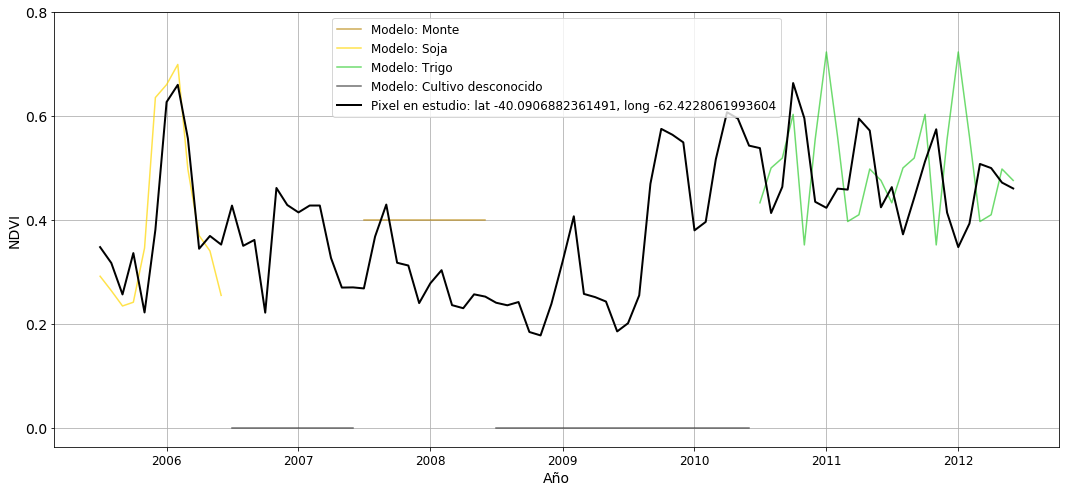

In [129]:
calculo_pixel_random()

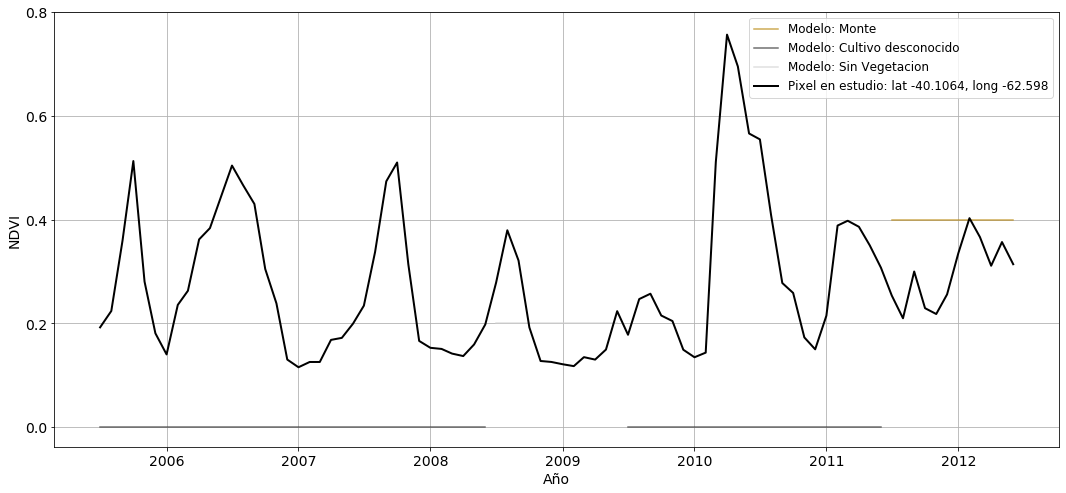

In [338]:
calculo_pixel_esp(-40.105534, -62.597643)

/Users/lucio/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


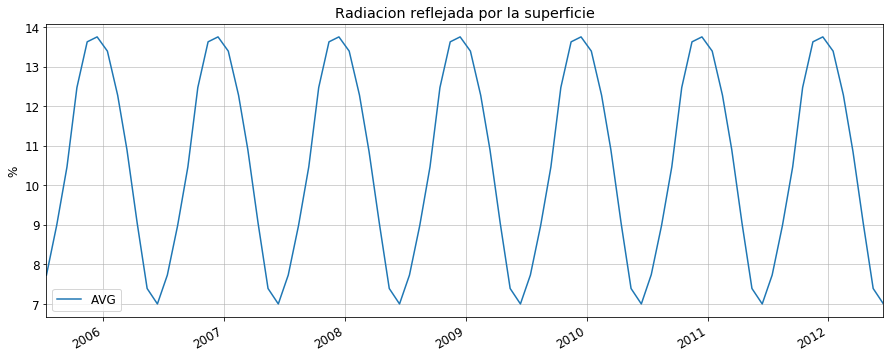

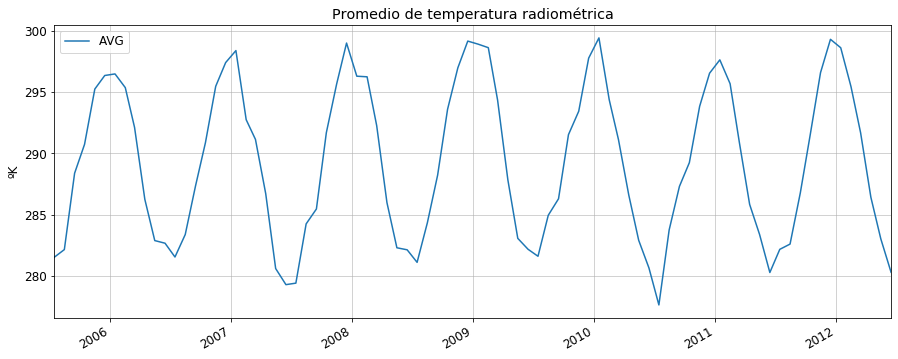

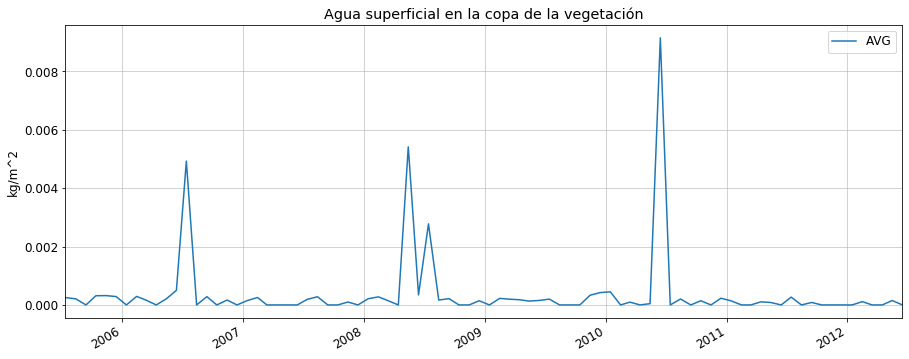

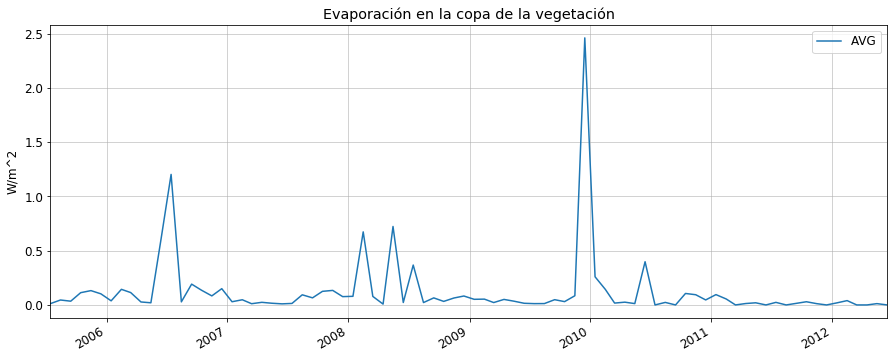

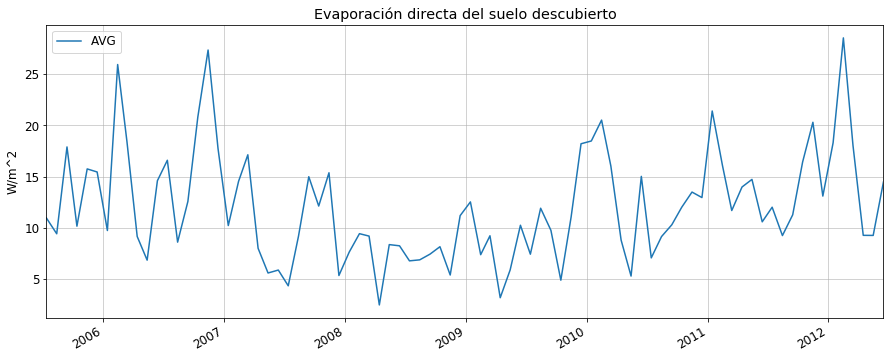

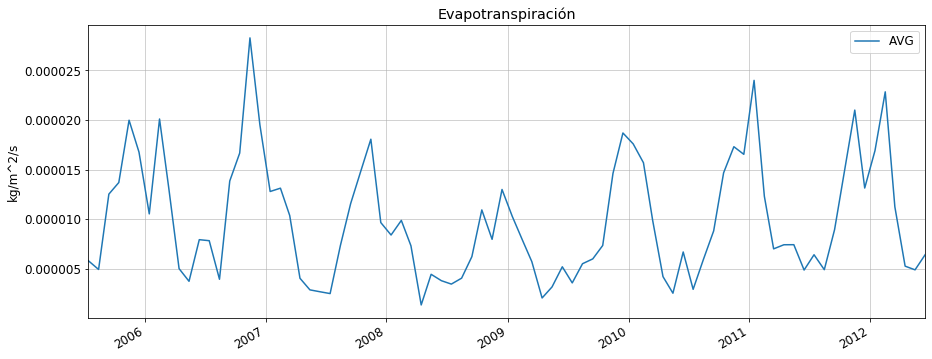

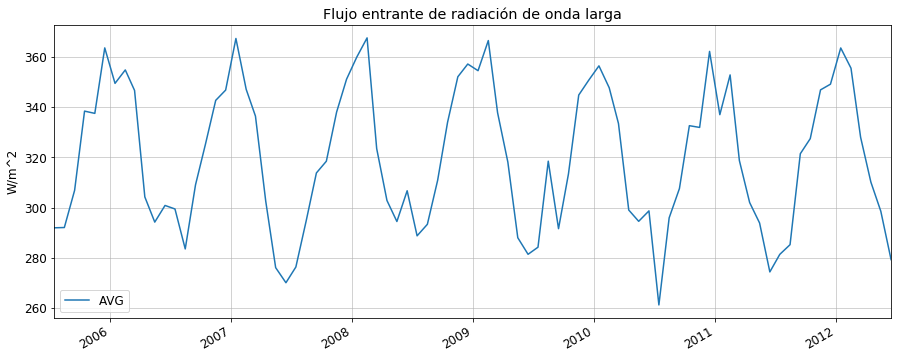

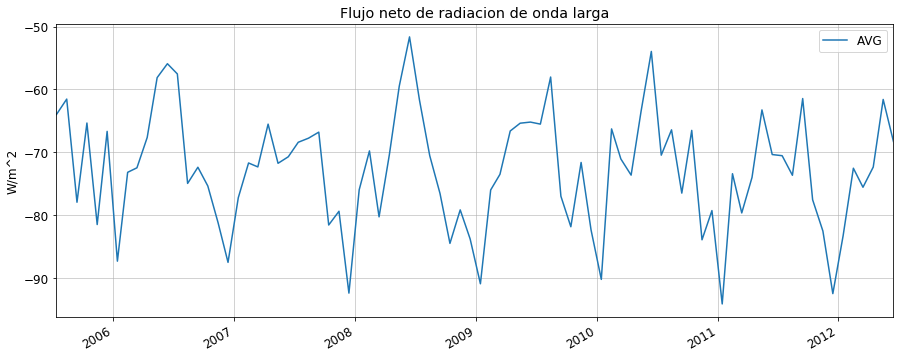

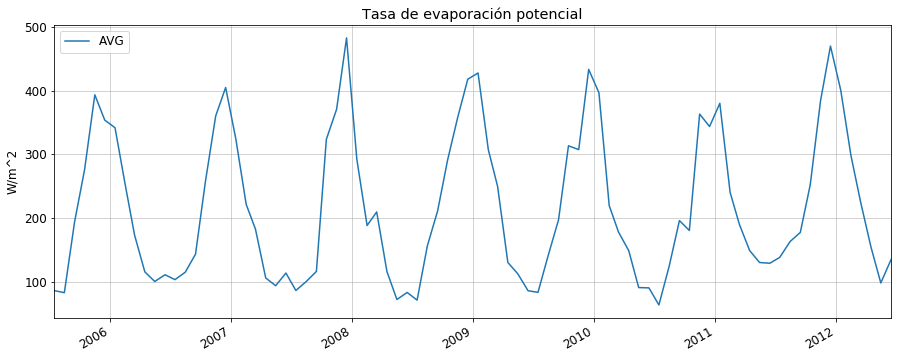

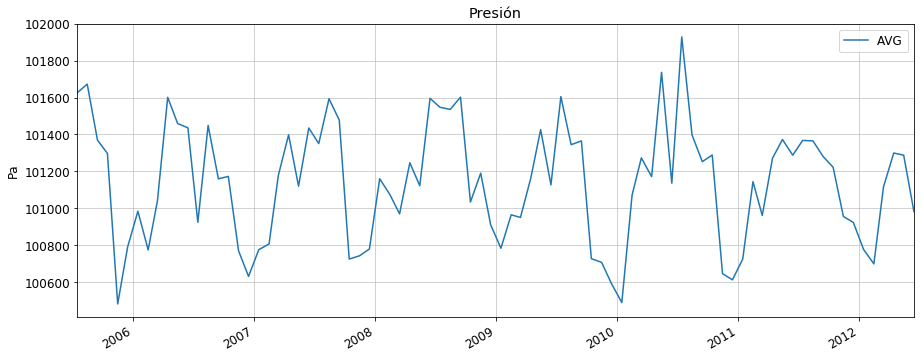

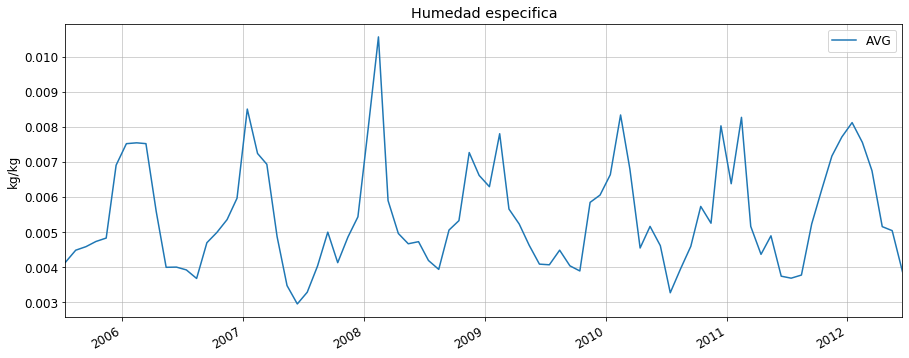

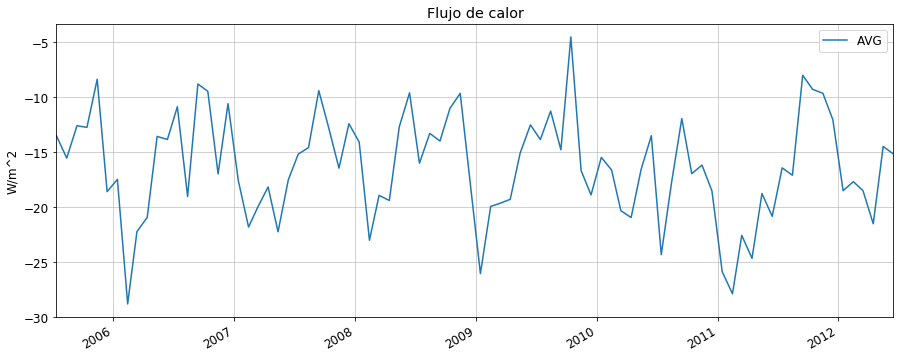

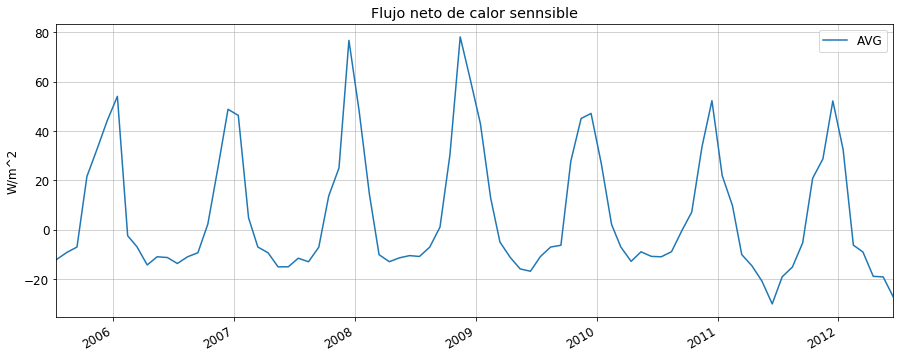

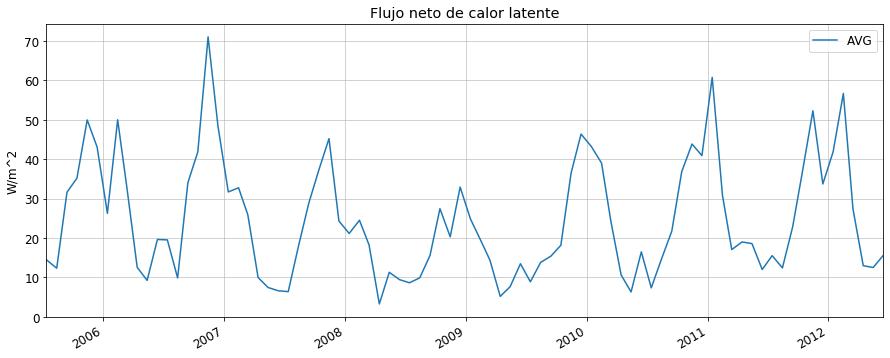

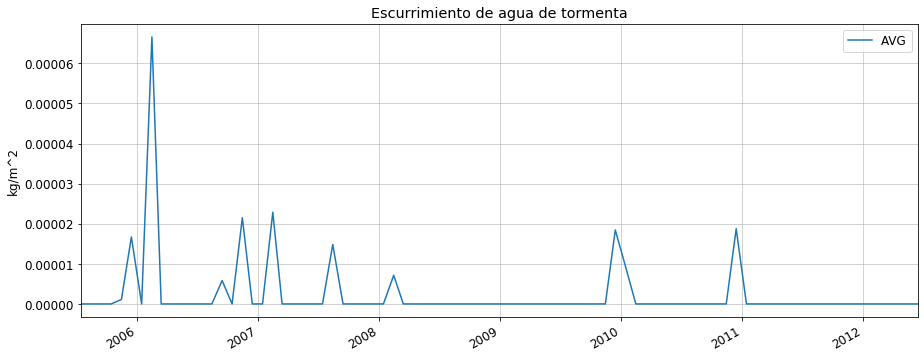

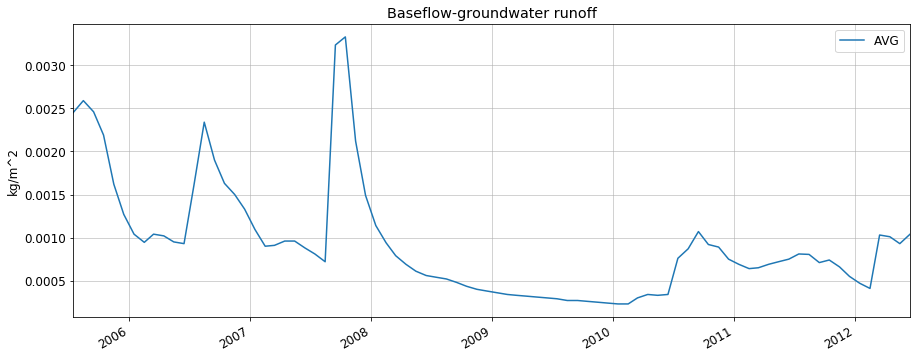

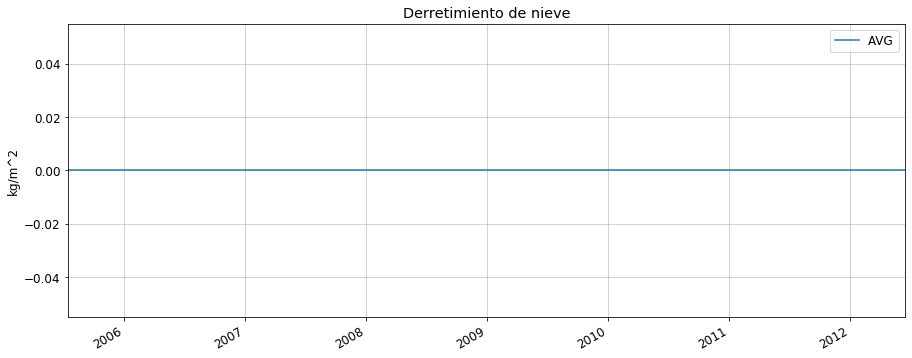

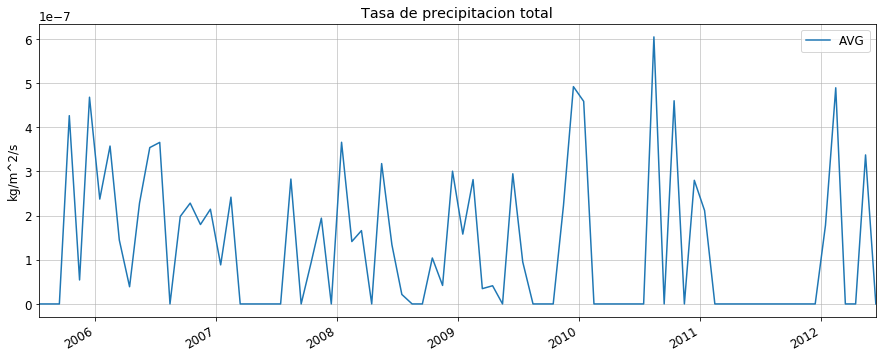

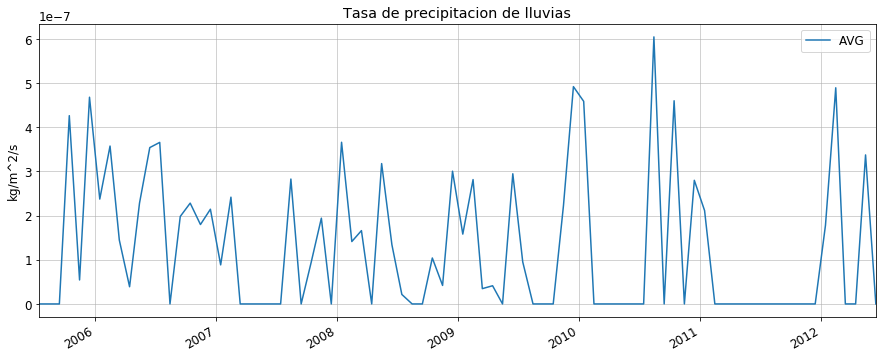

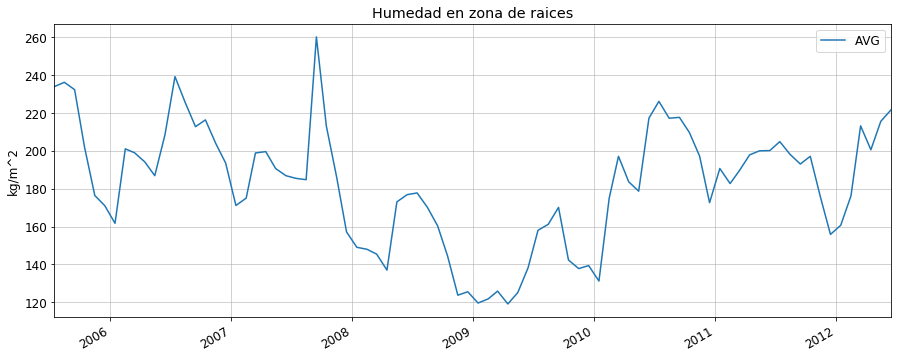

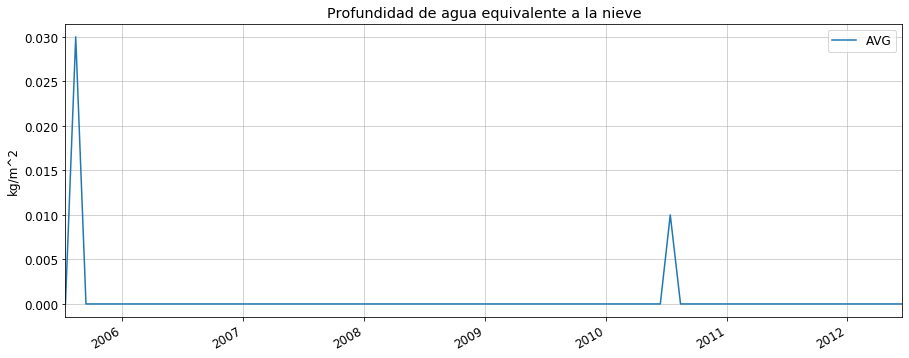

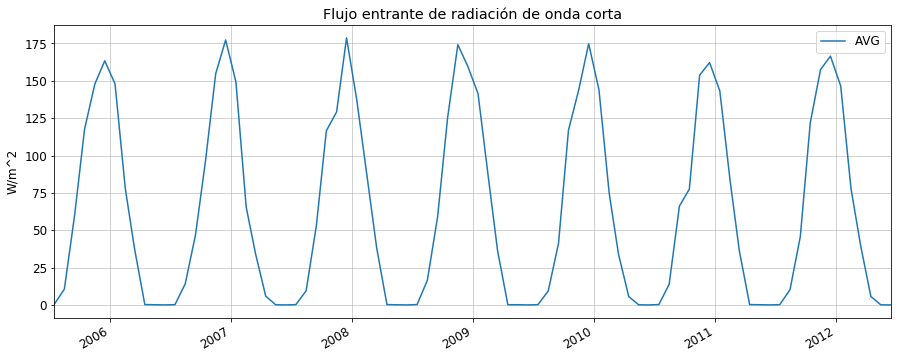

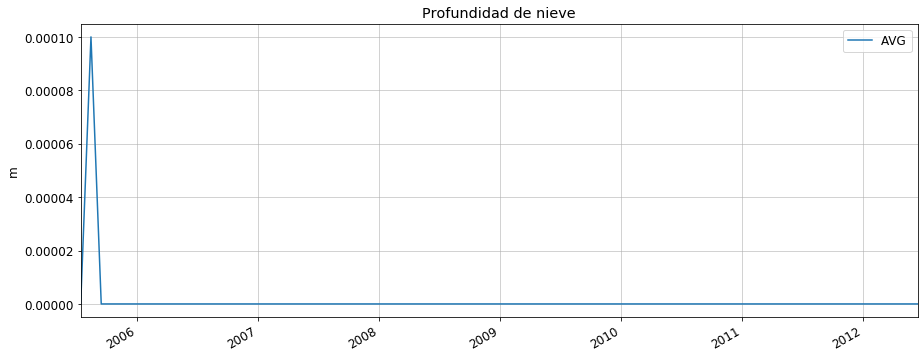

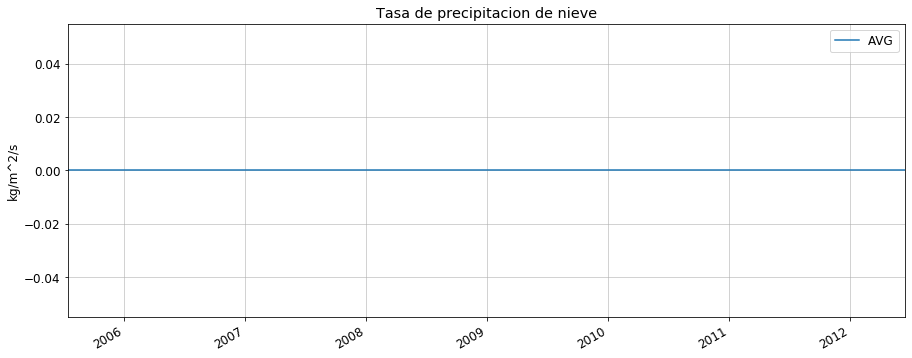

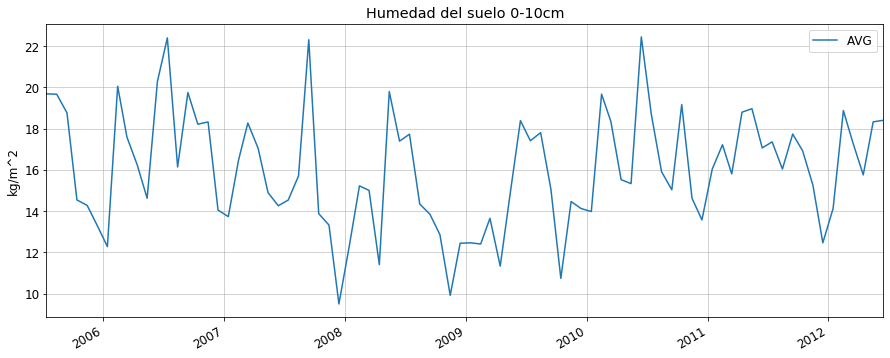

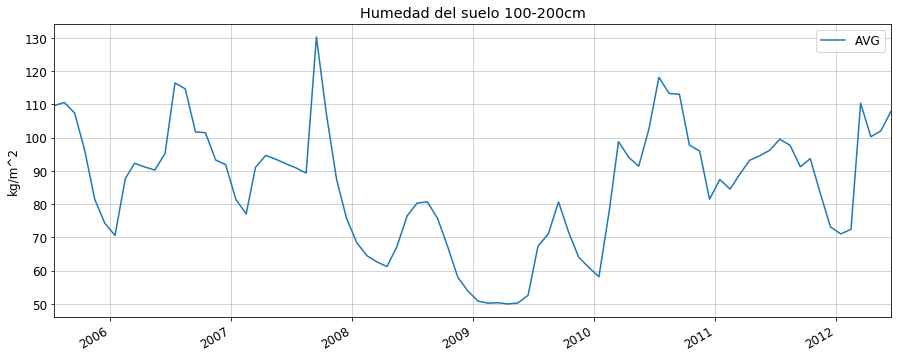

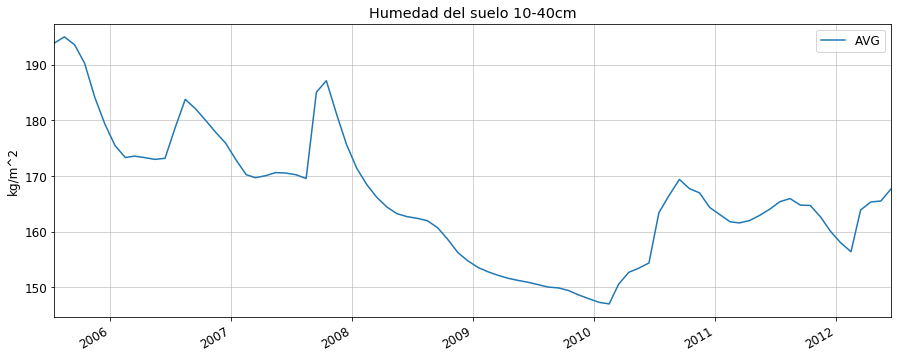

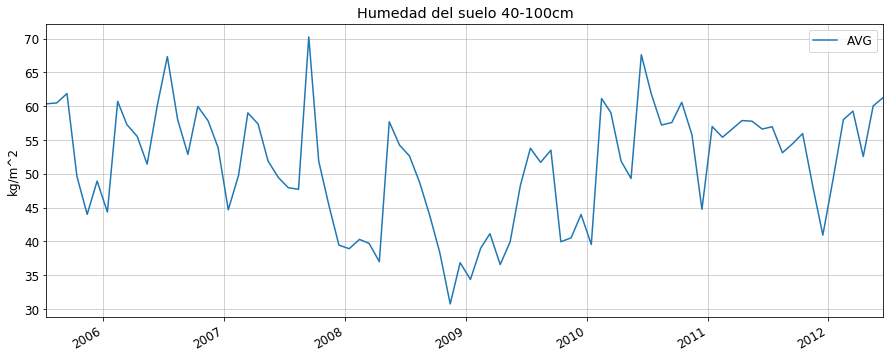

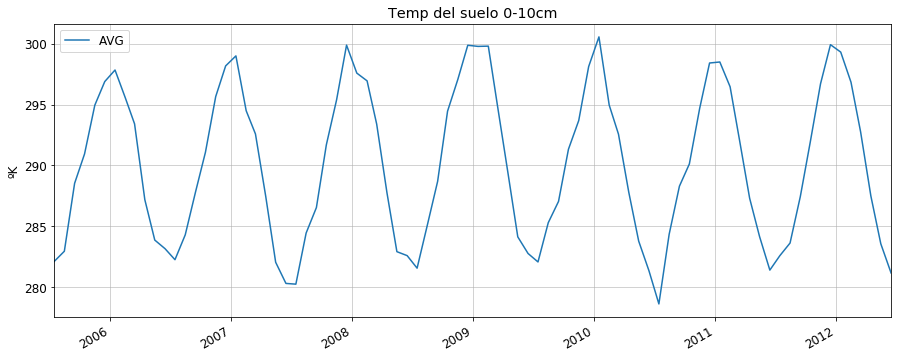

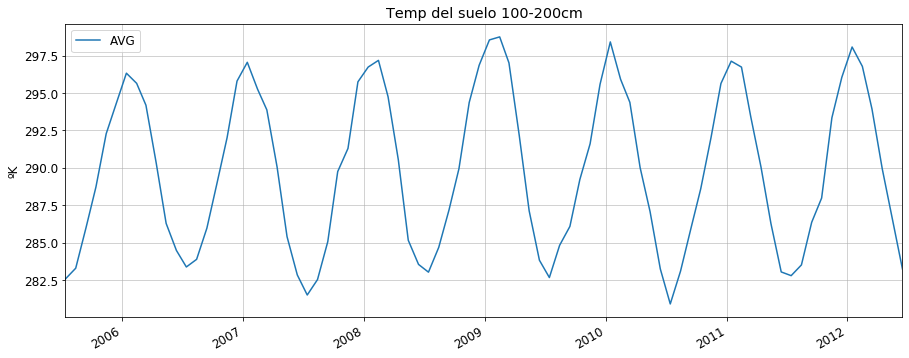

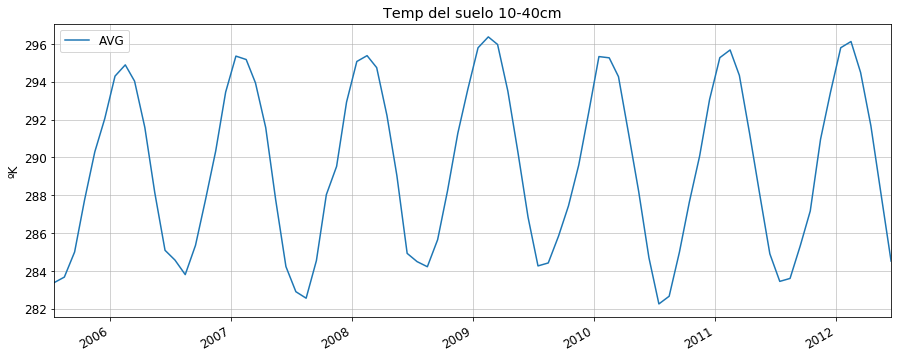

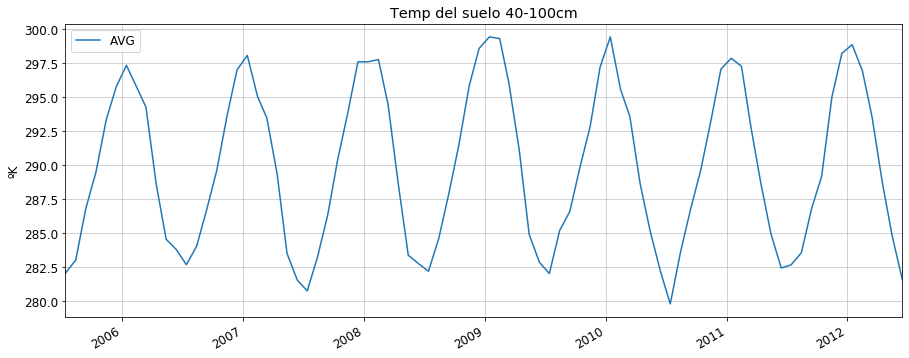

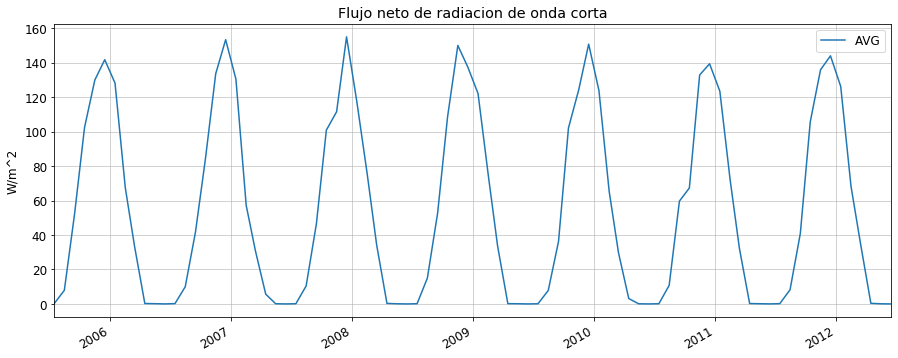

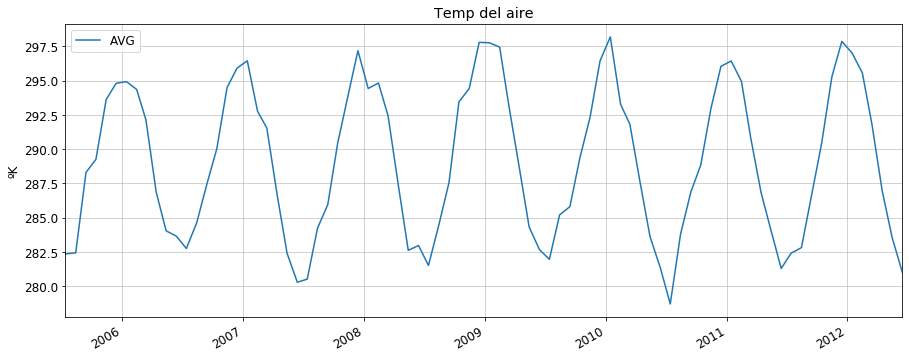

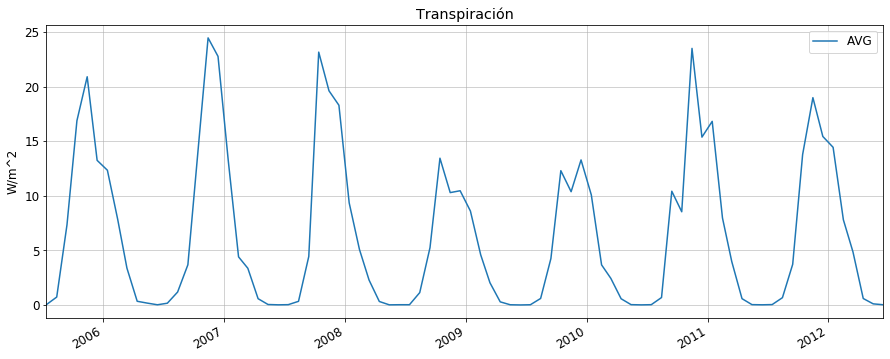

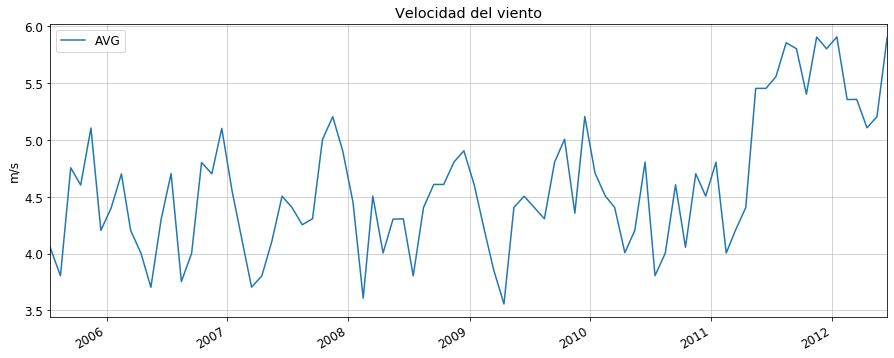

In [11]:
Graficos_clima("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Resumen cambios 2005-2010.xlsx",(-39.533732759995,-62.8113275597421))

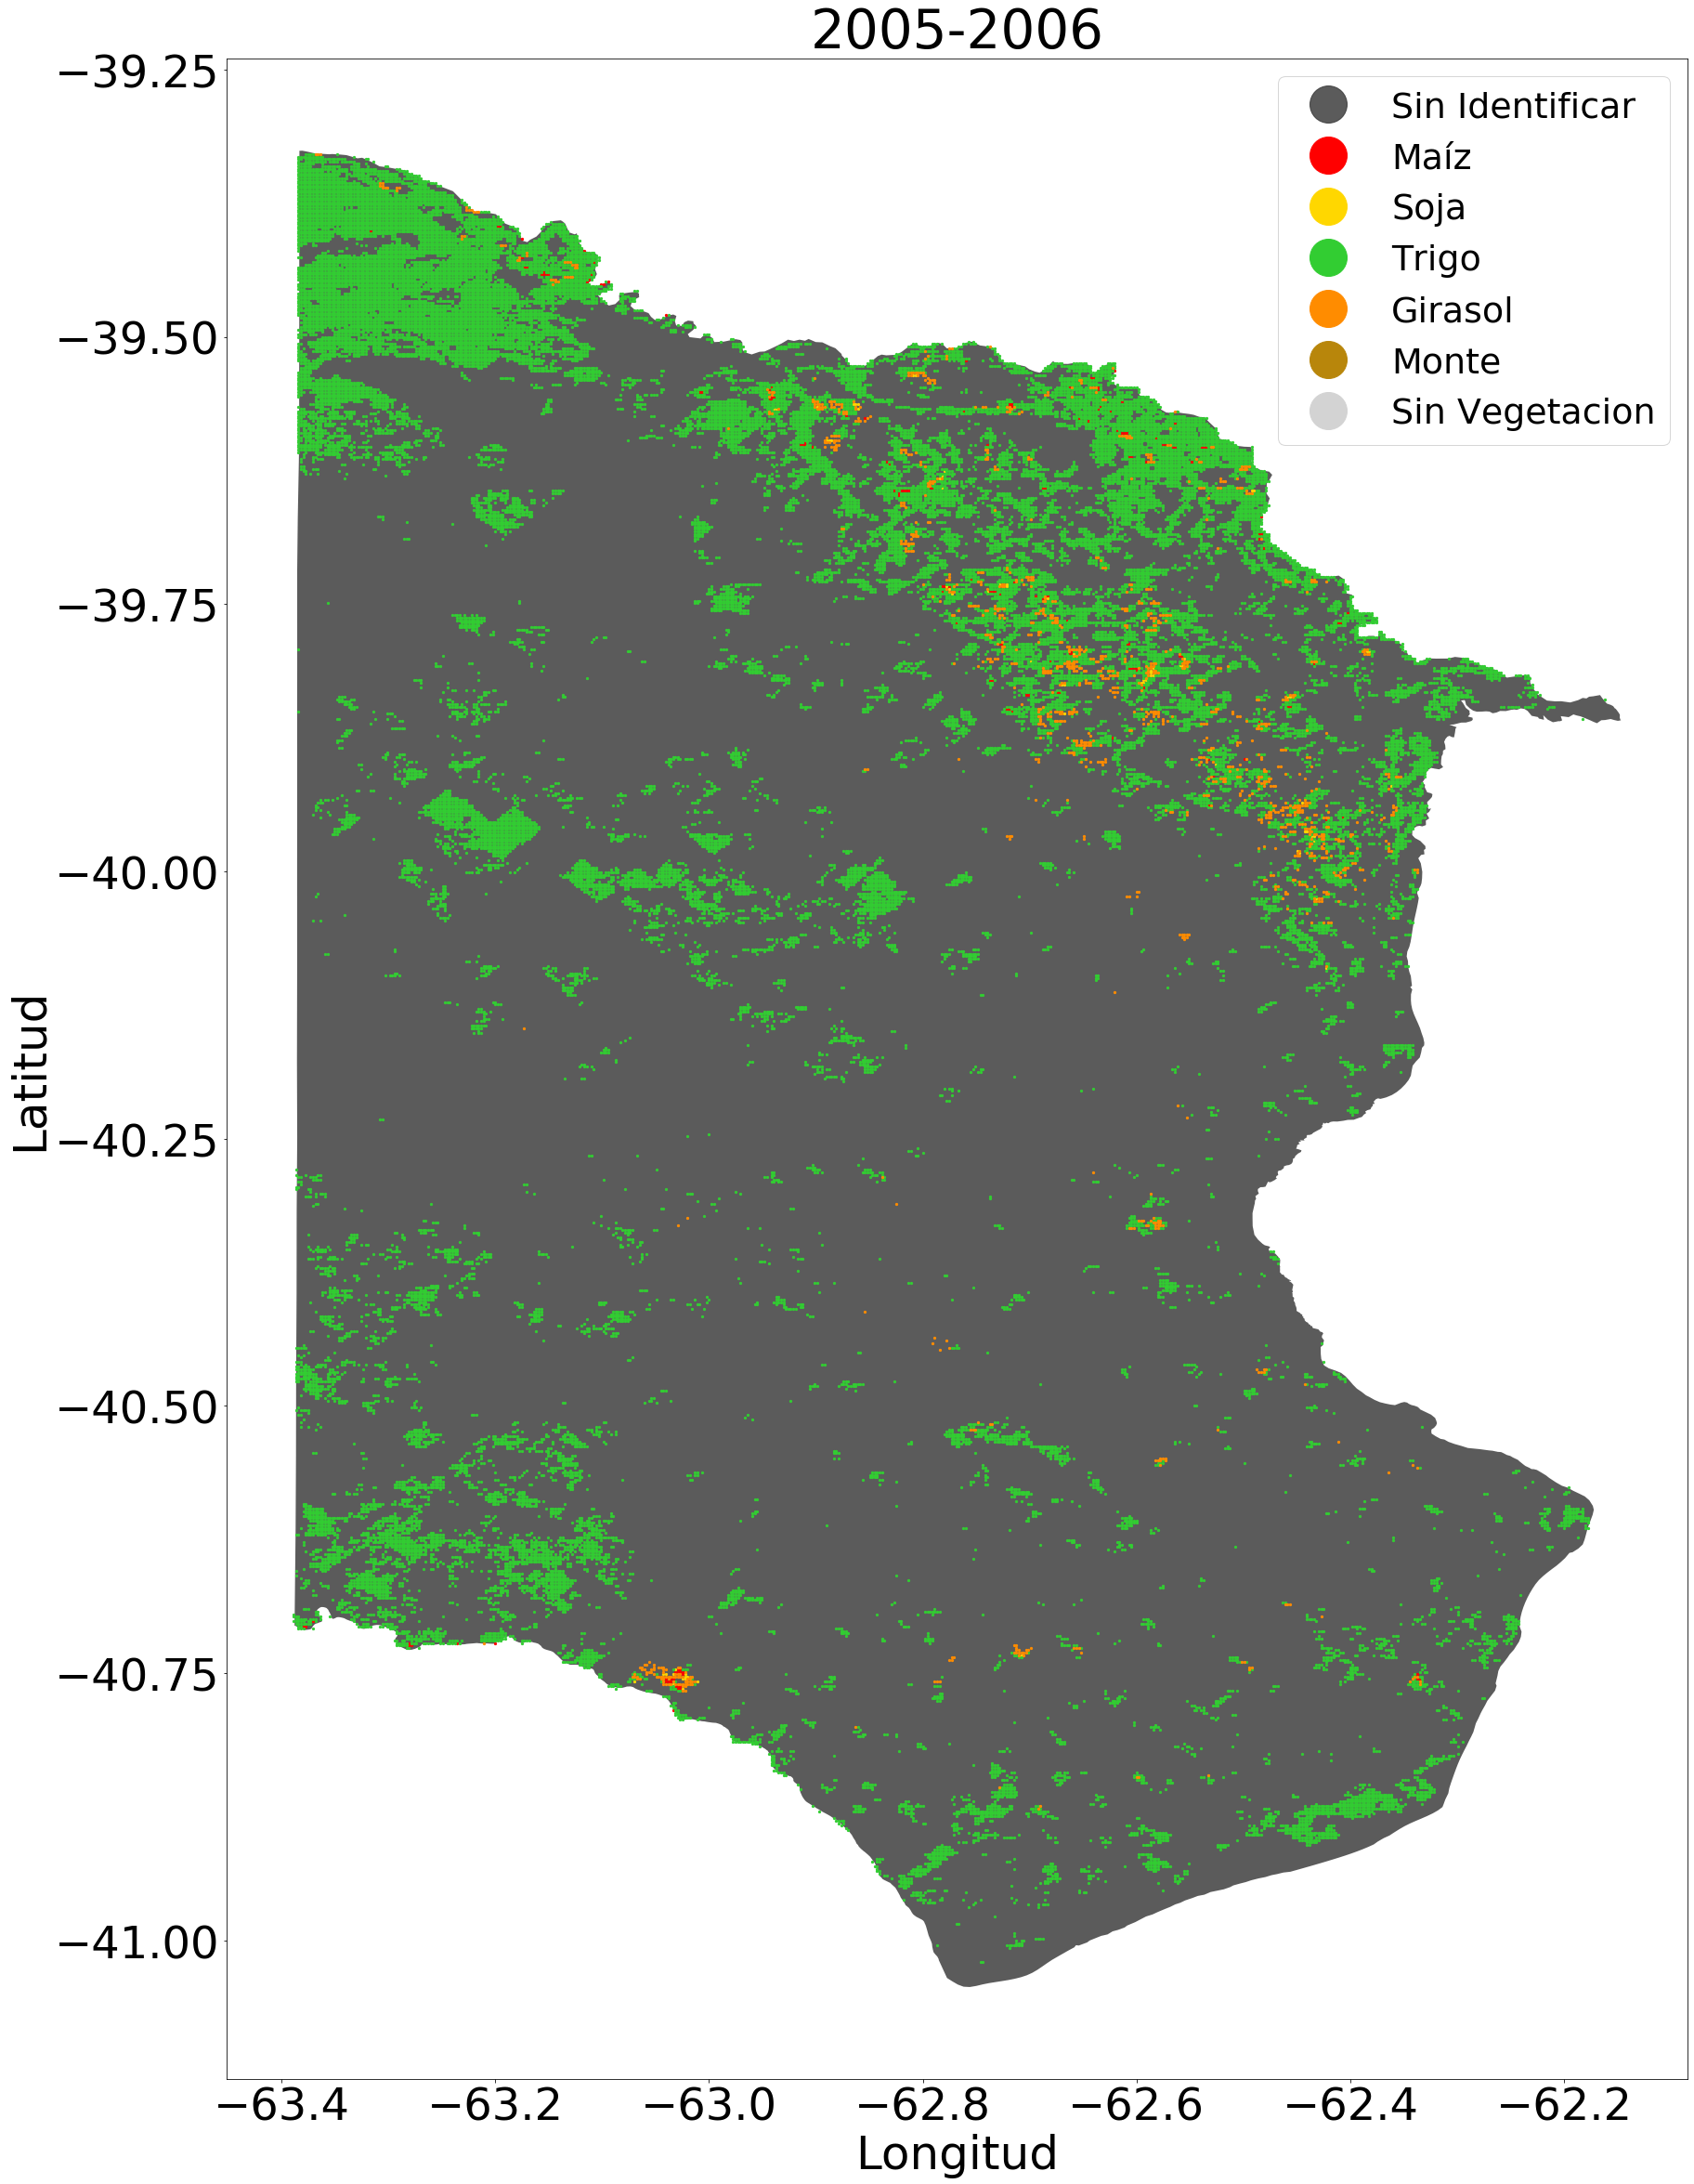

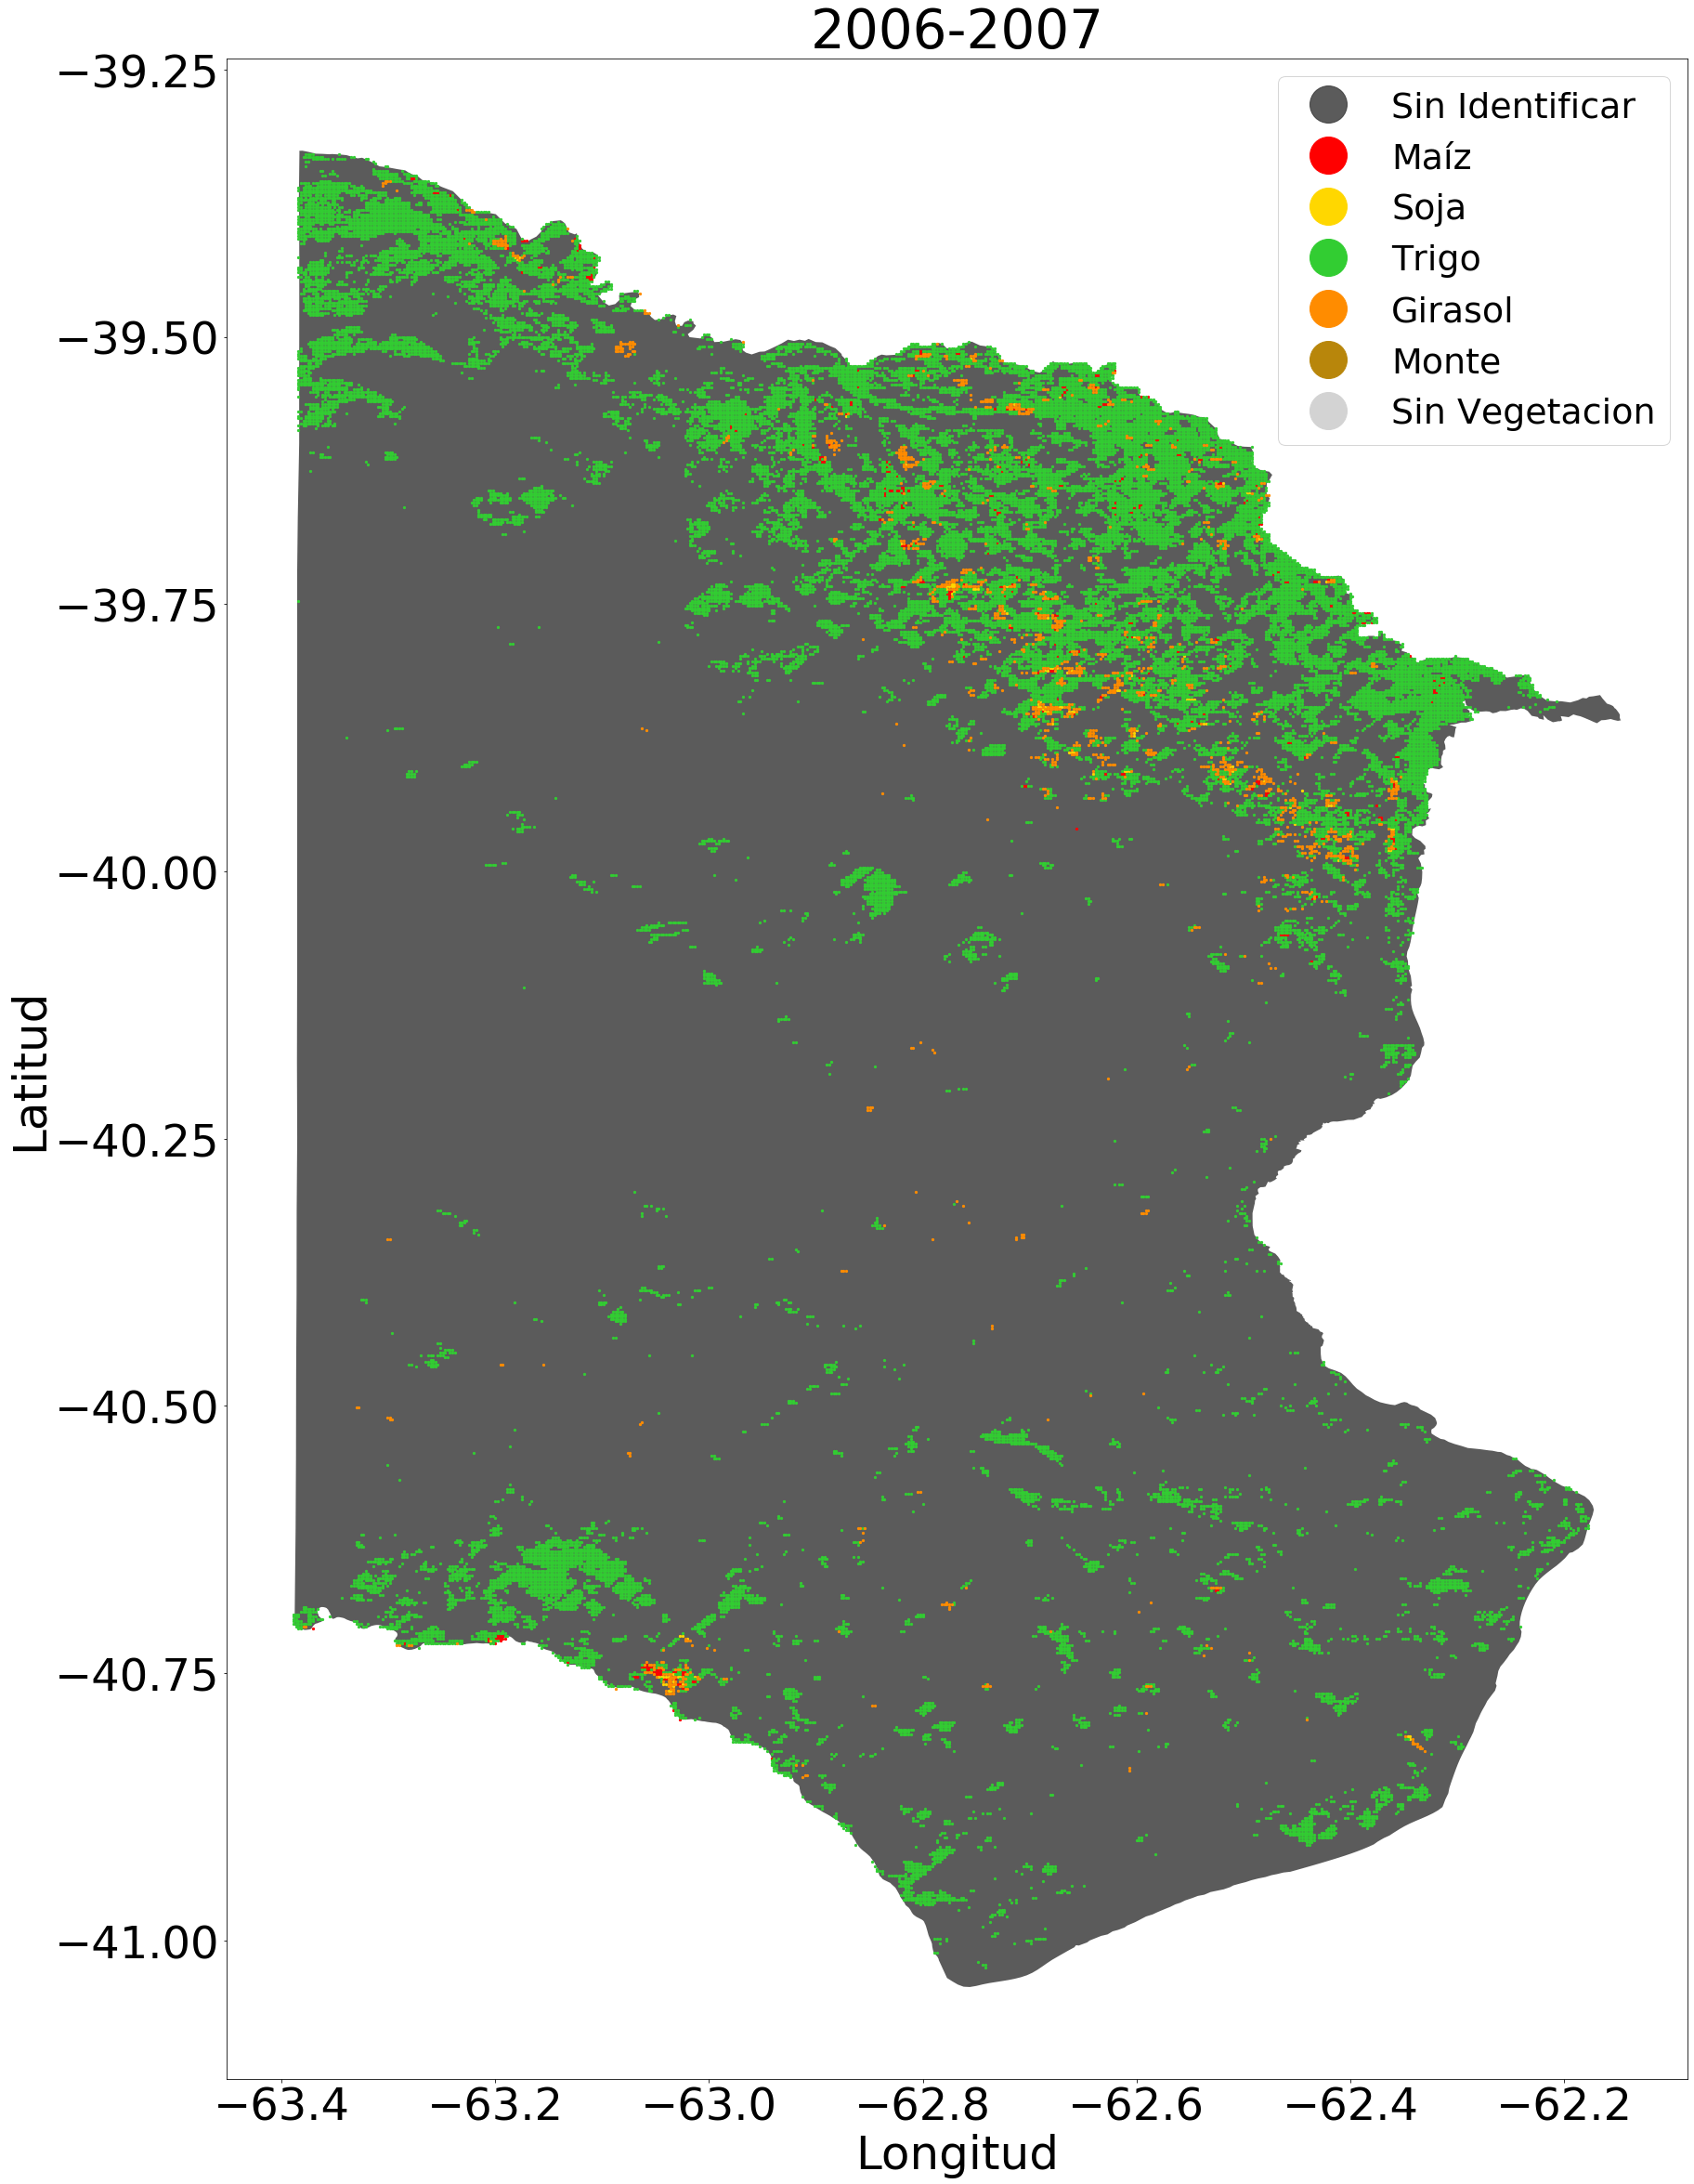

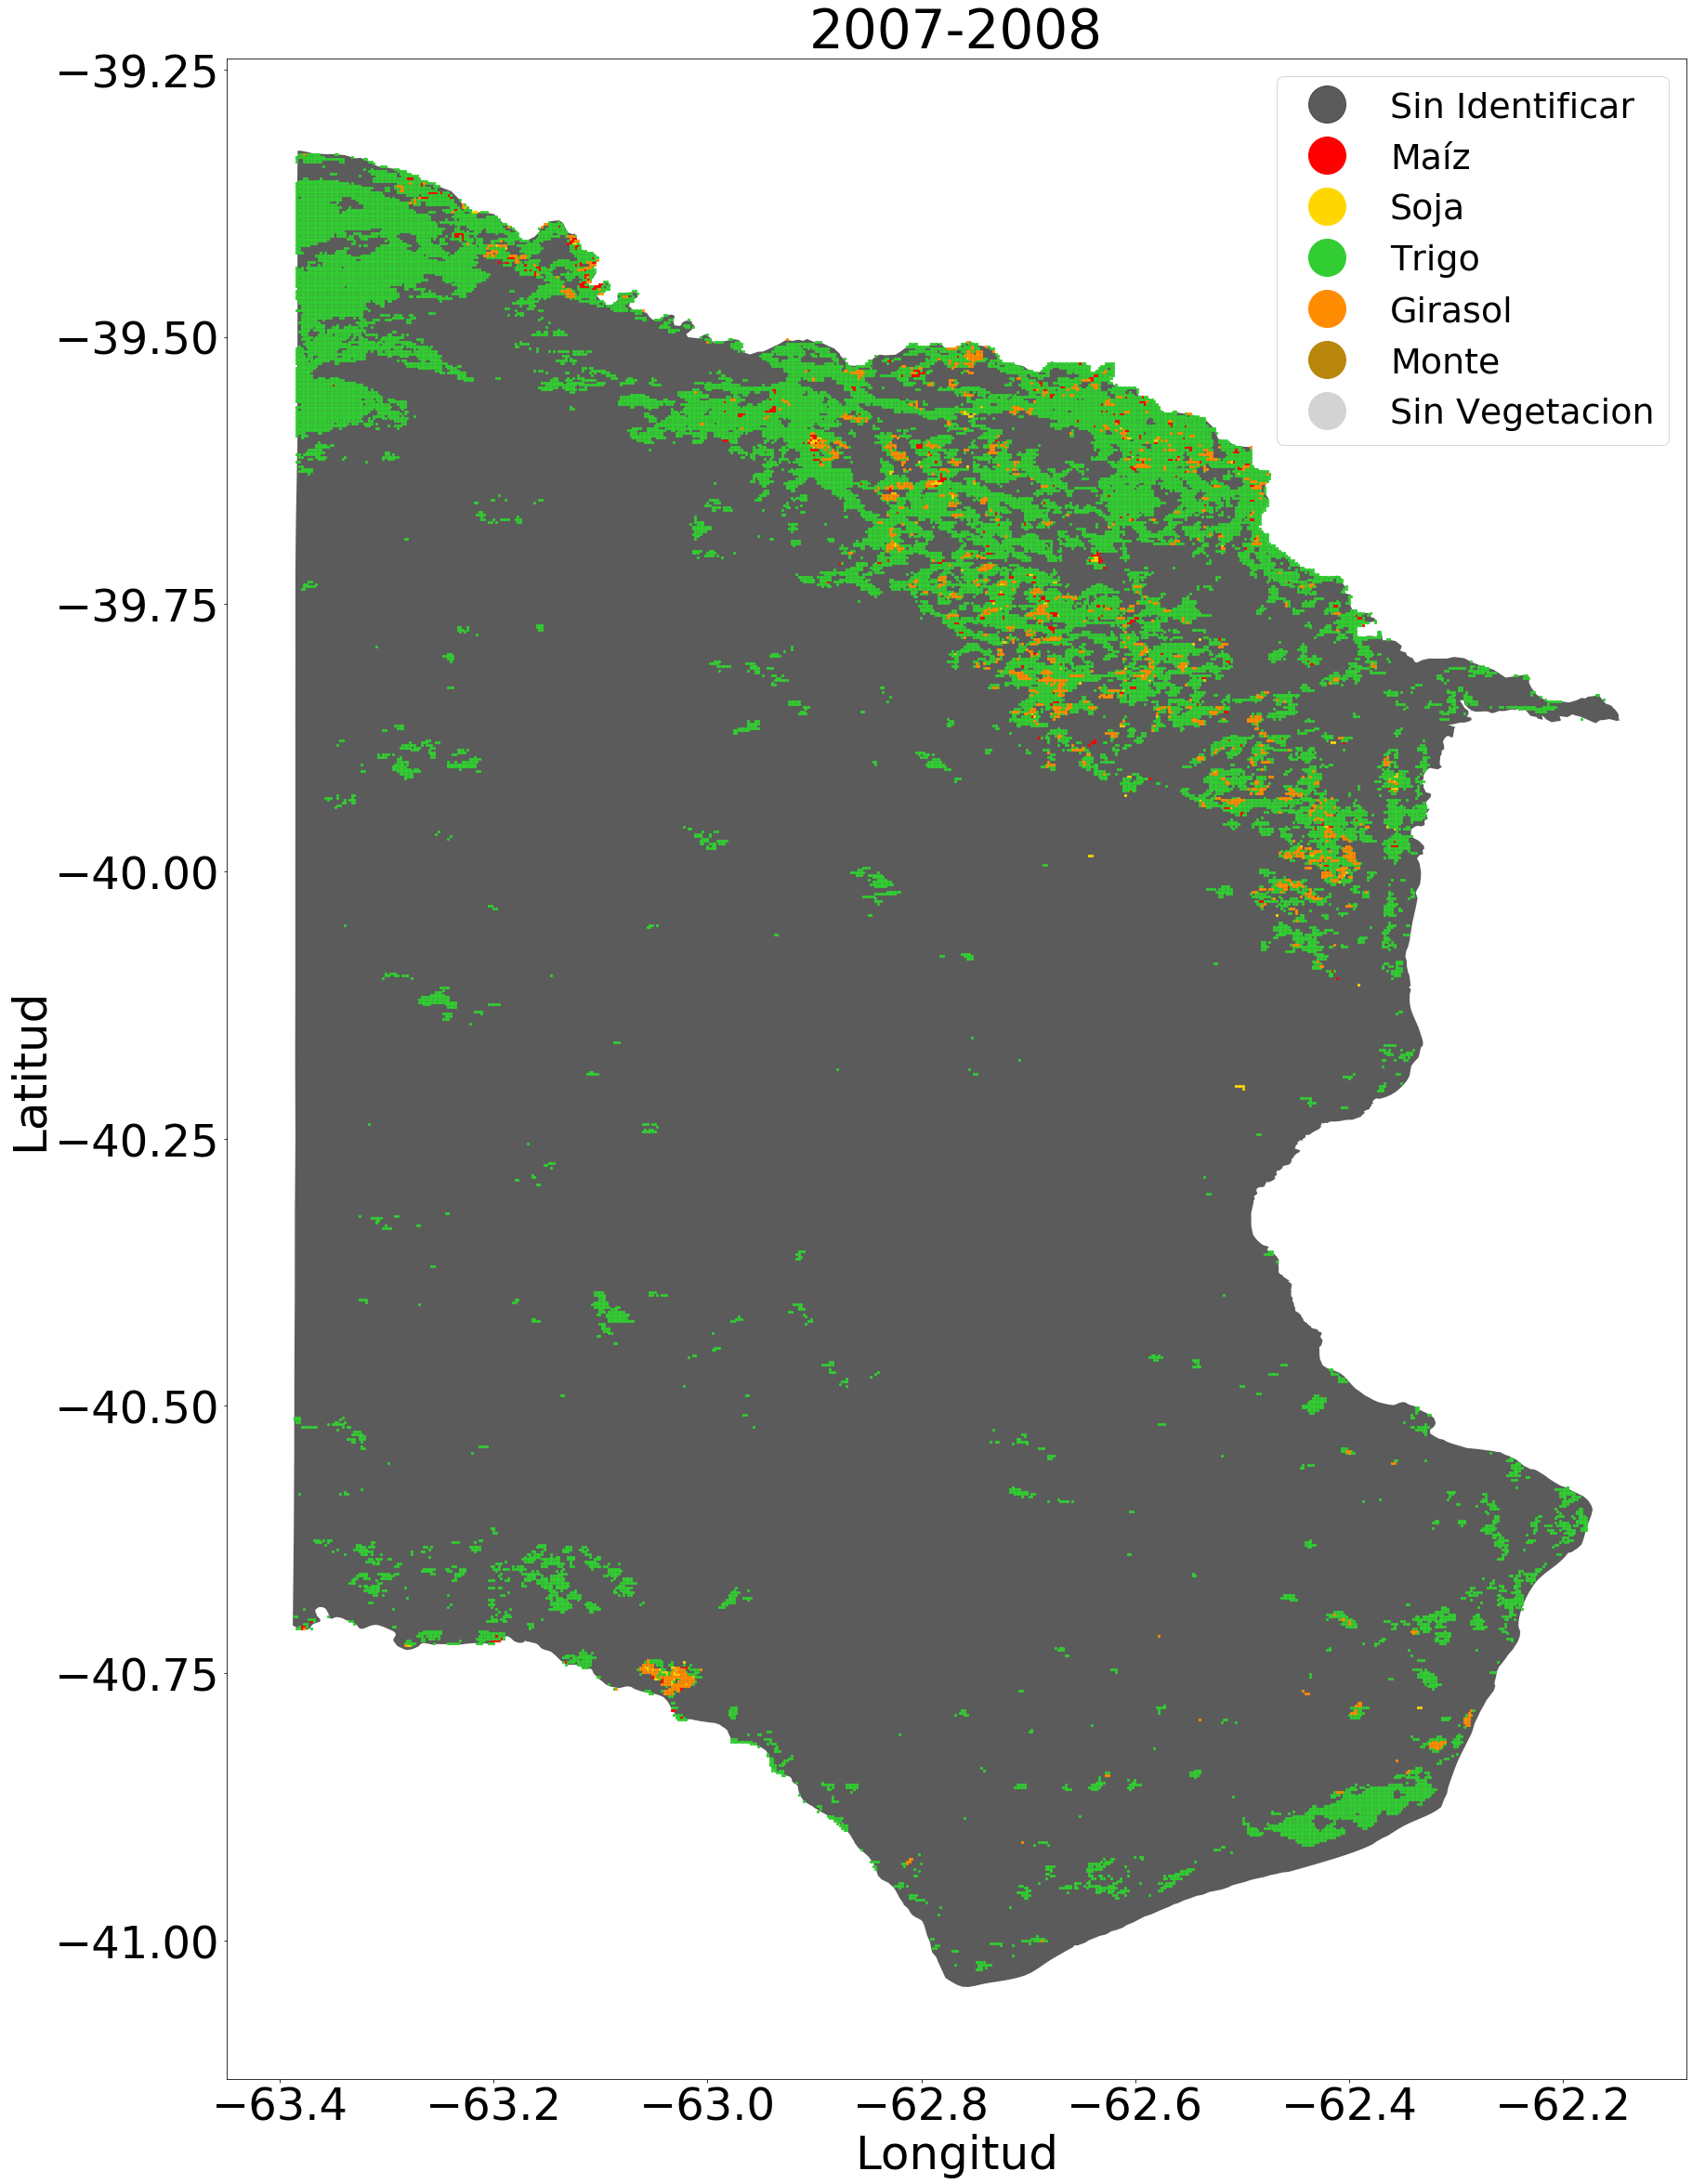

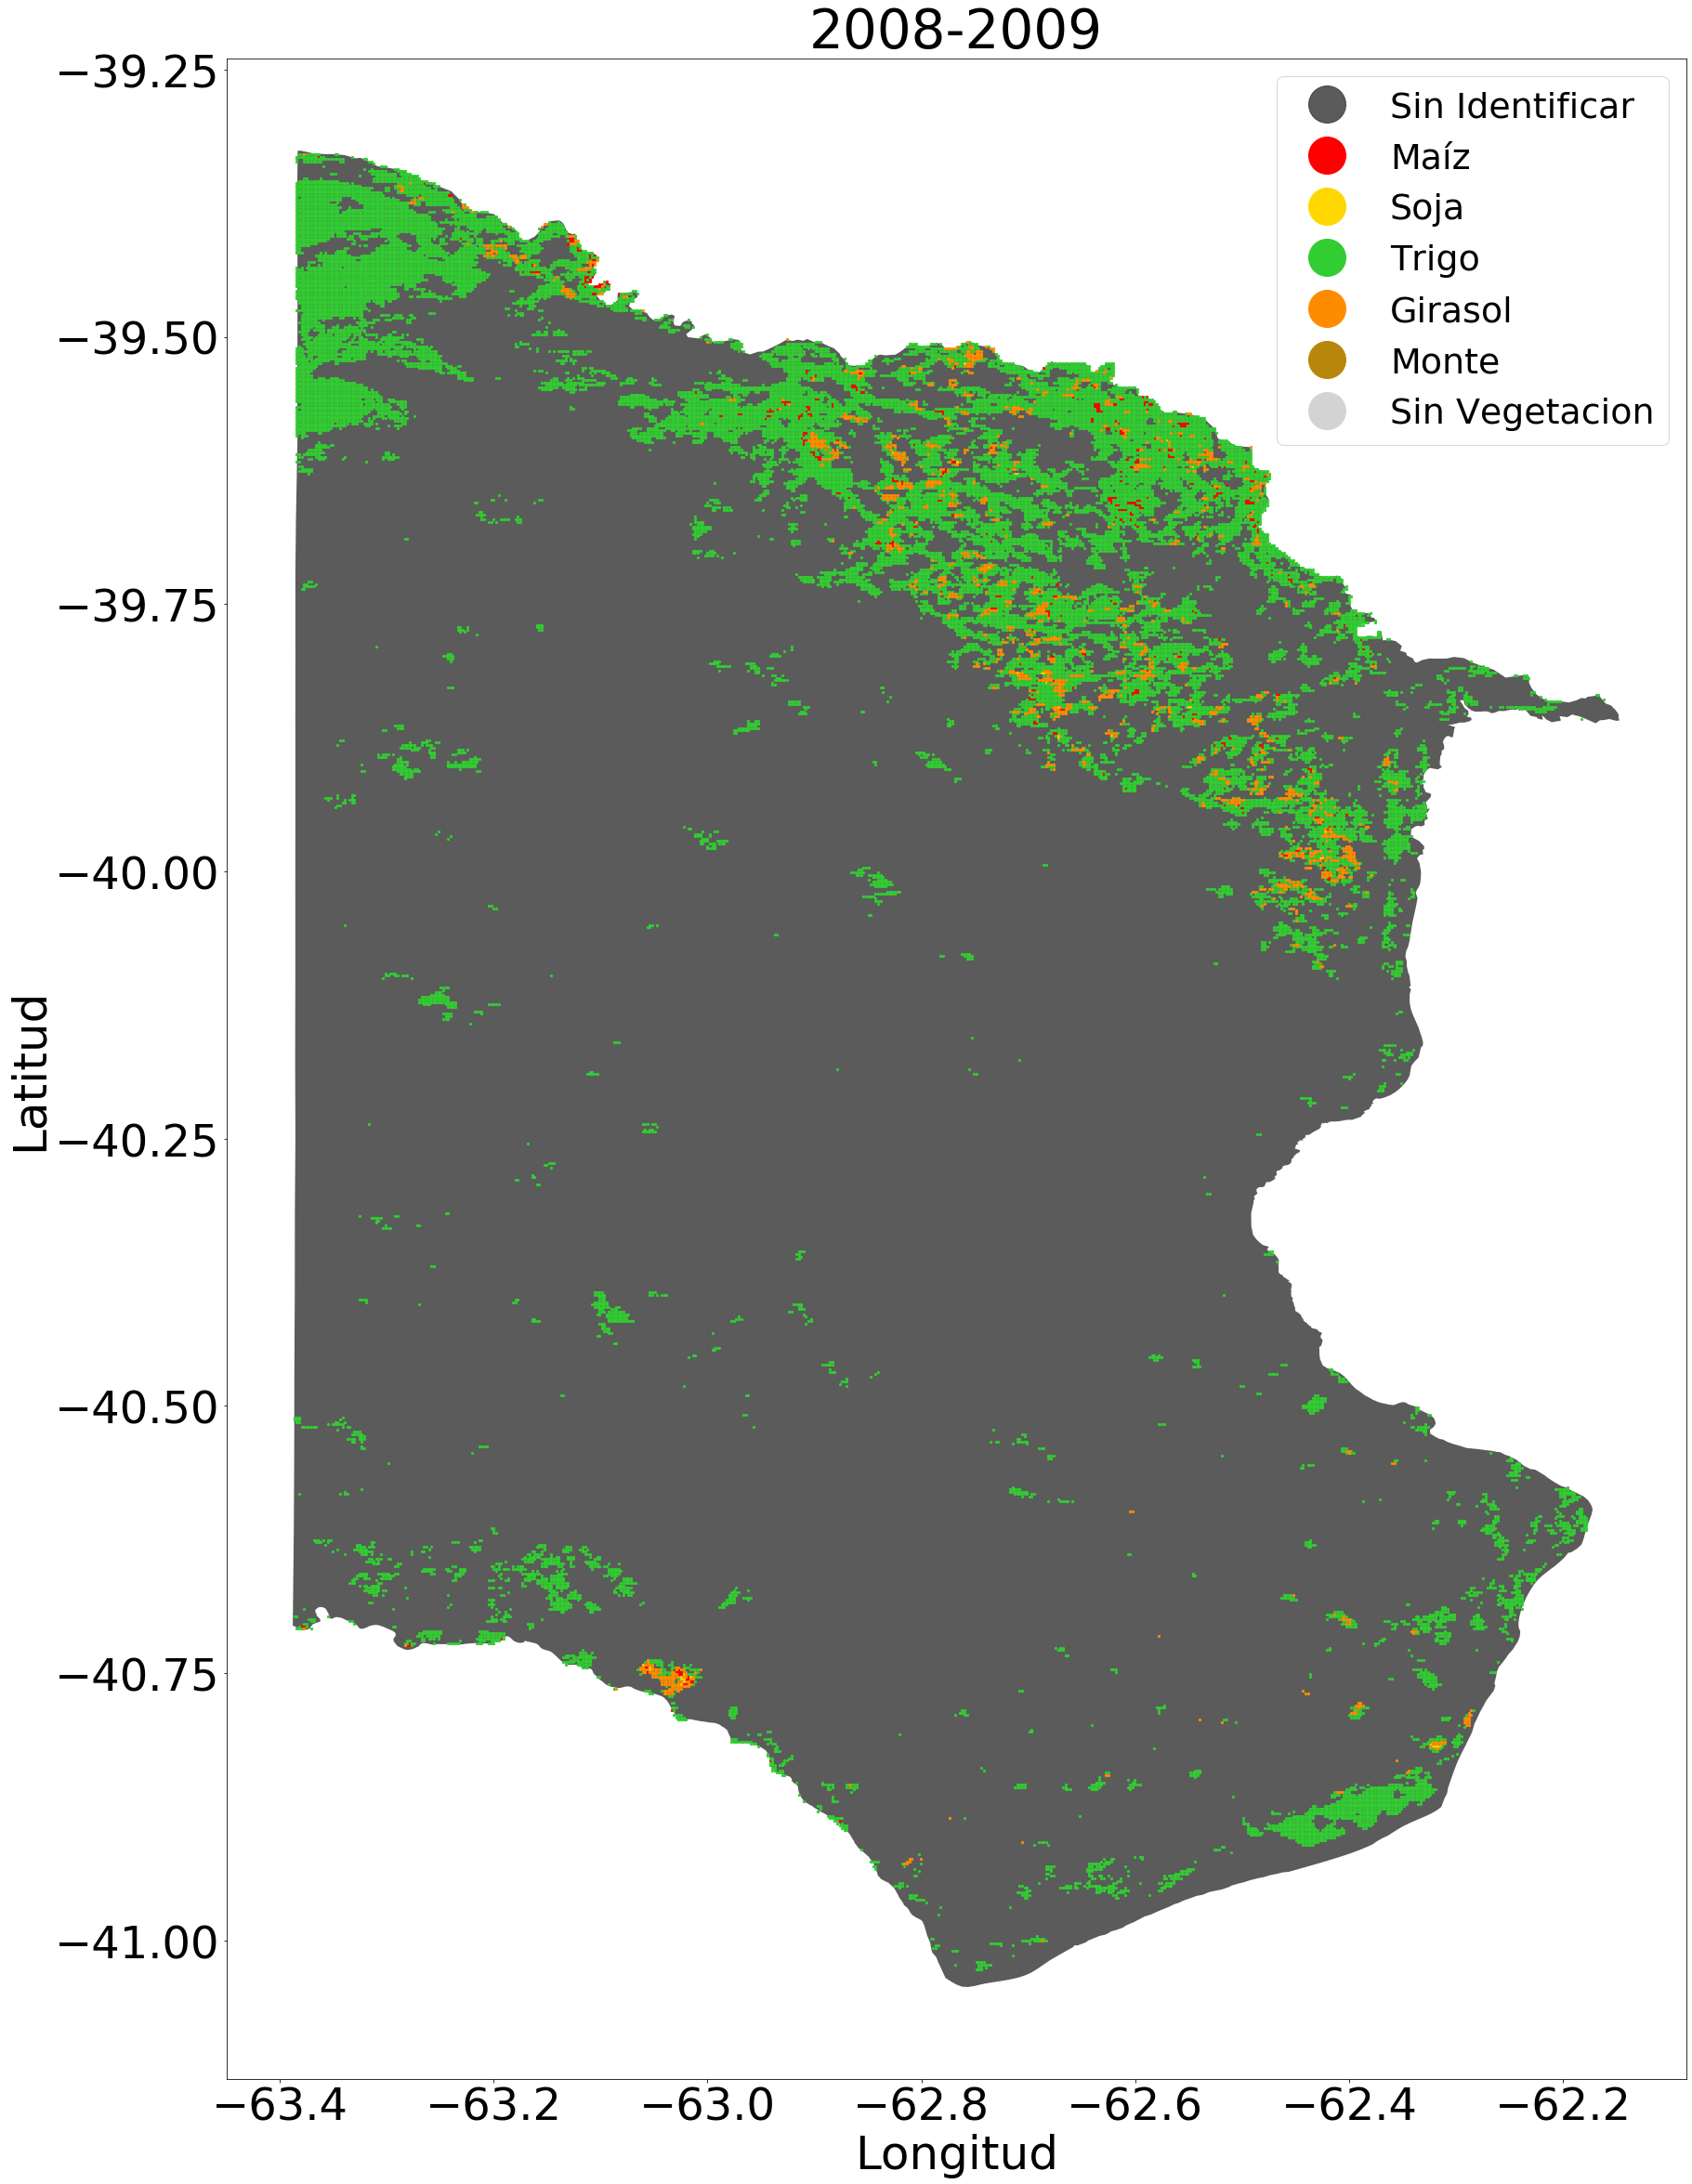

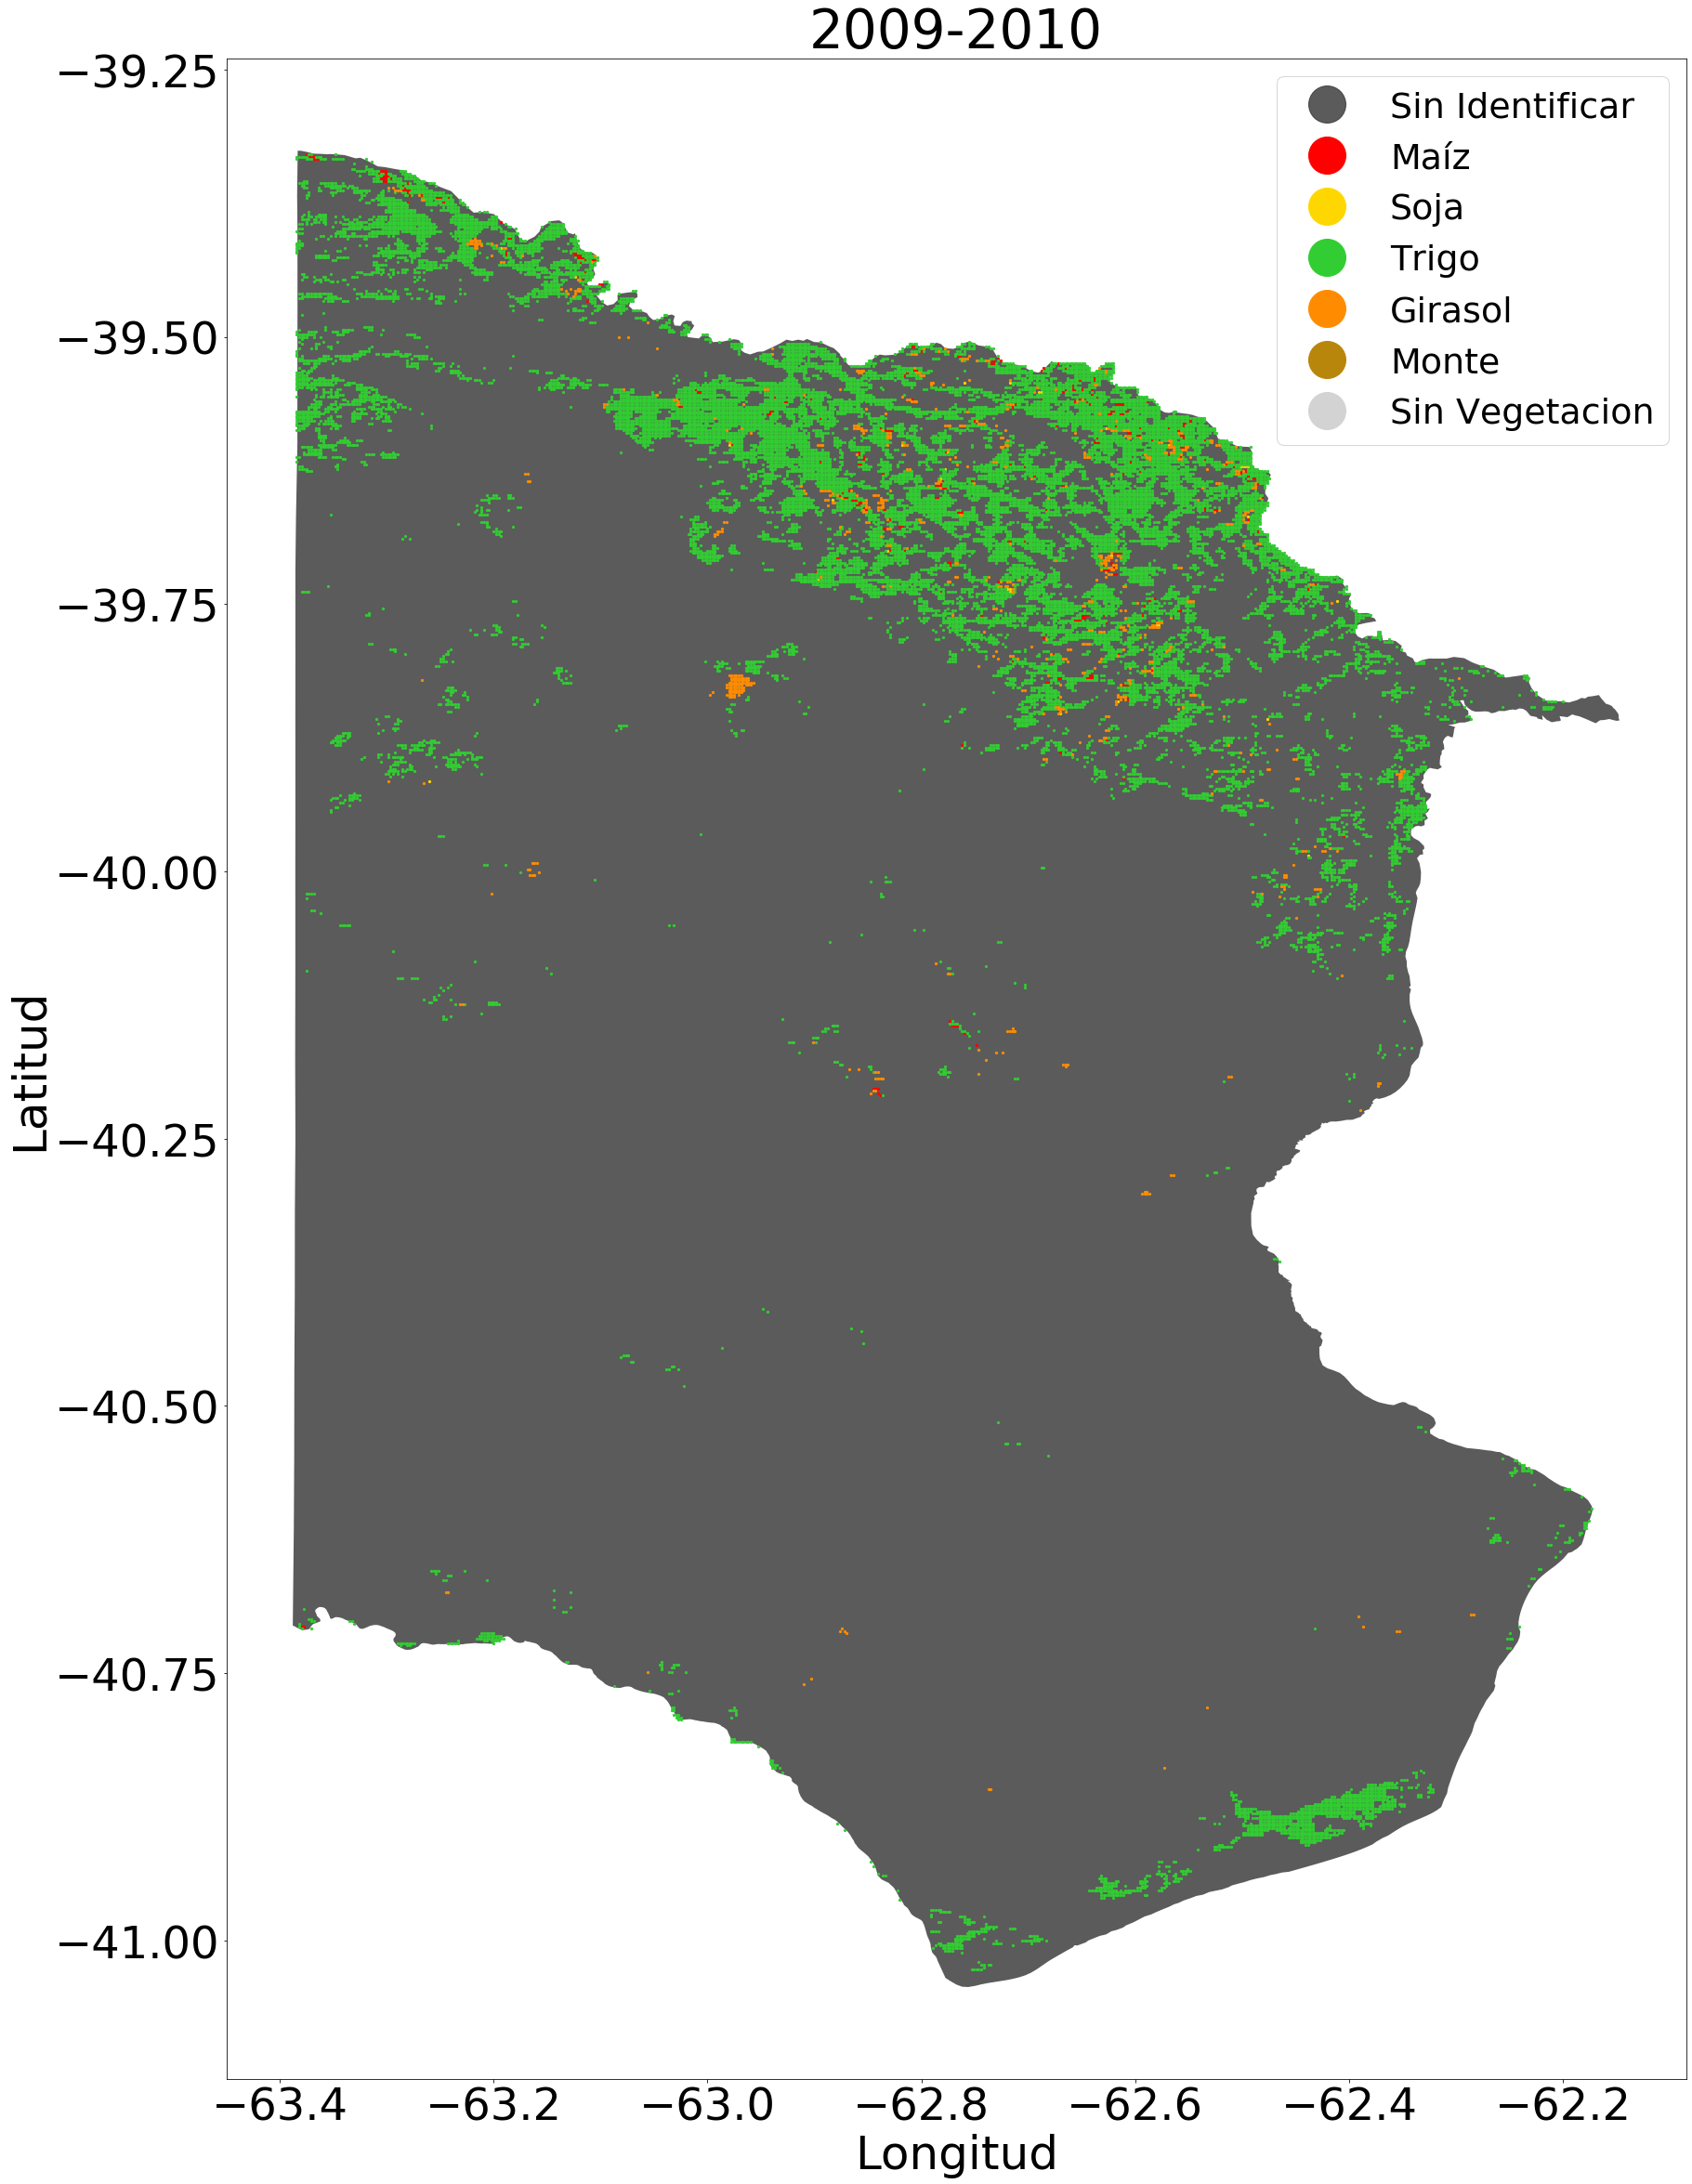

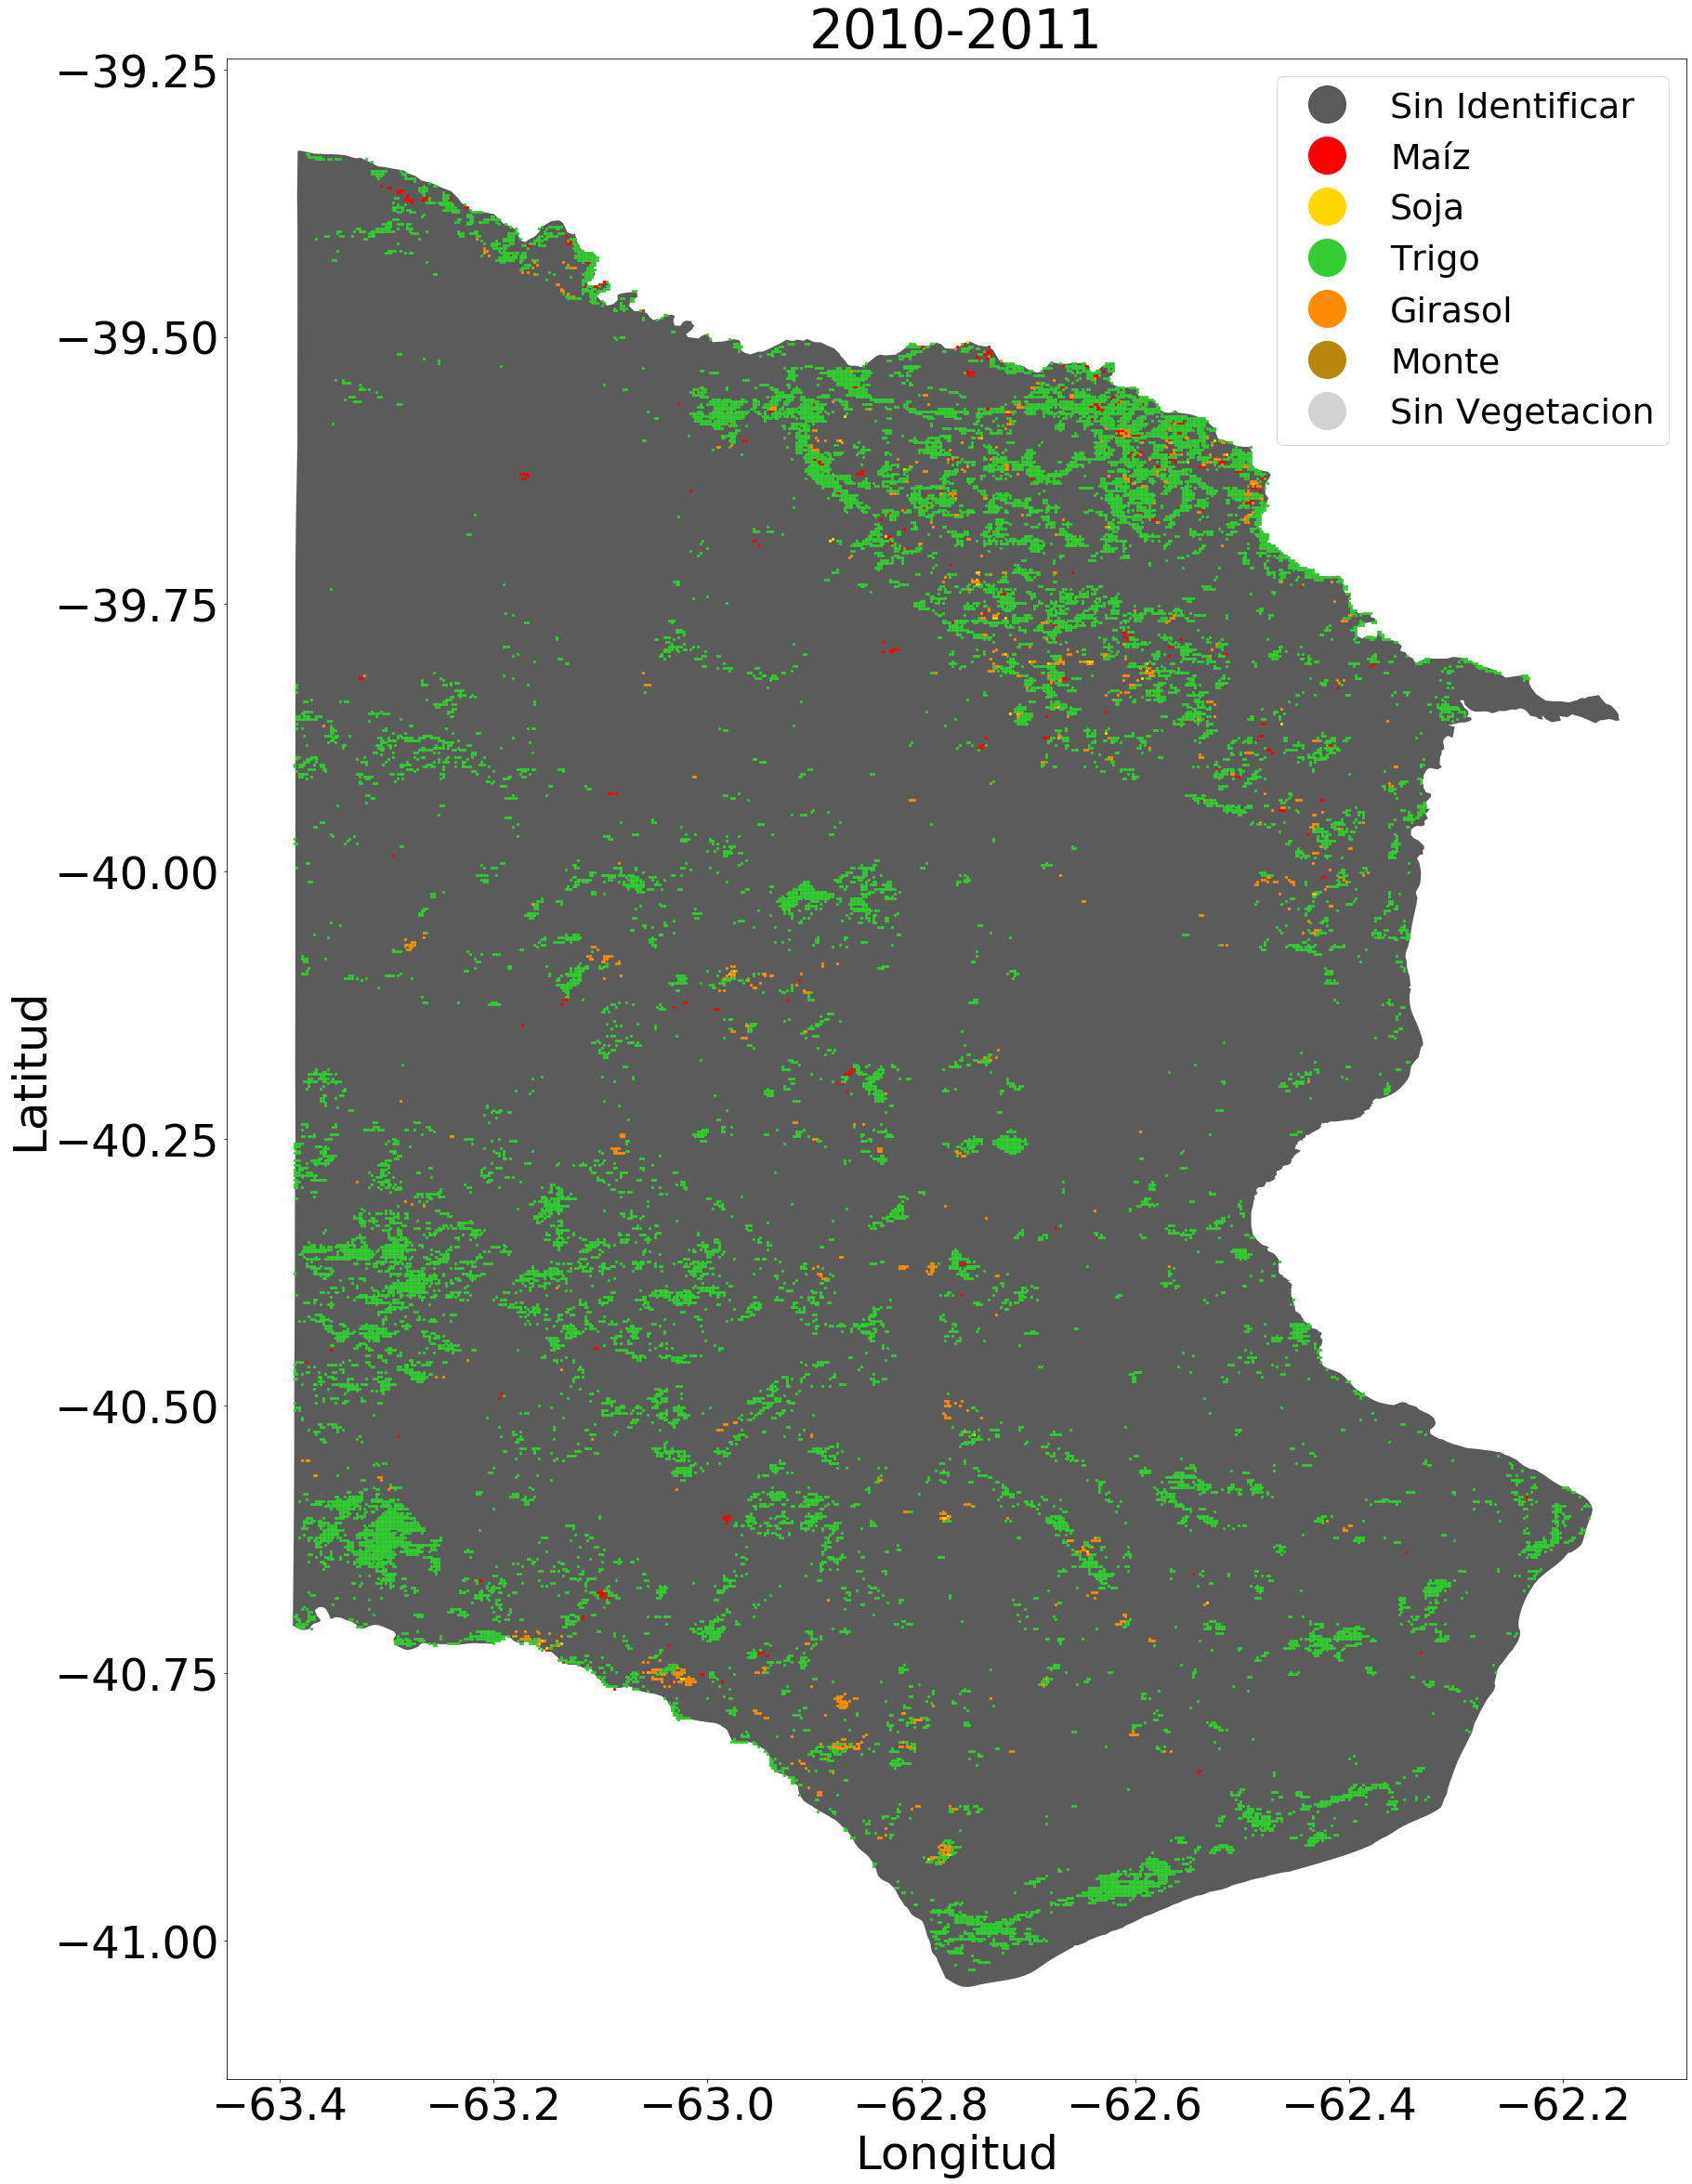

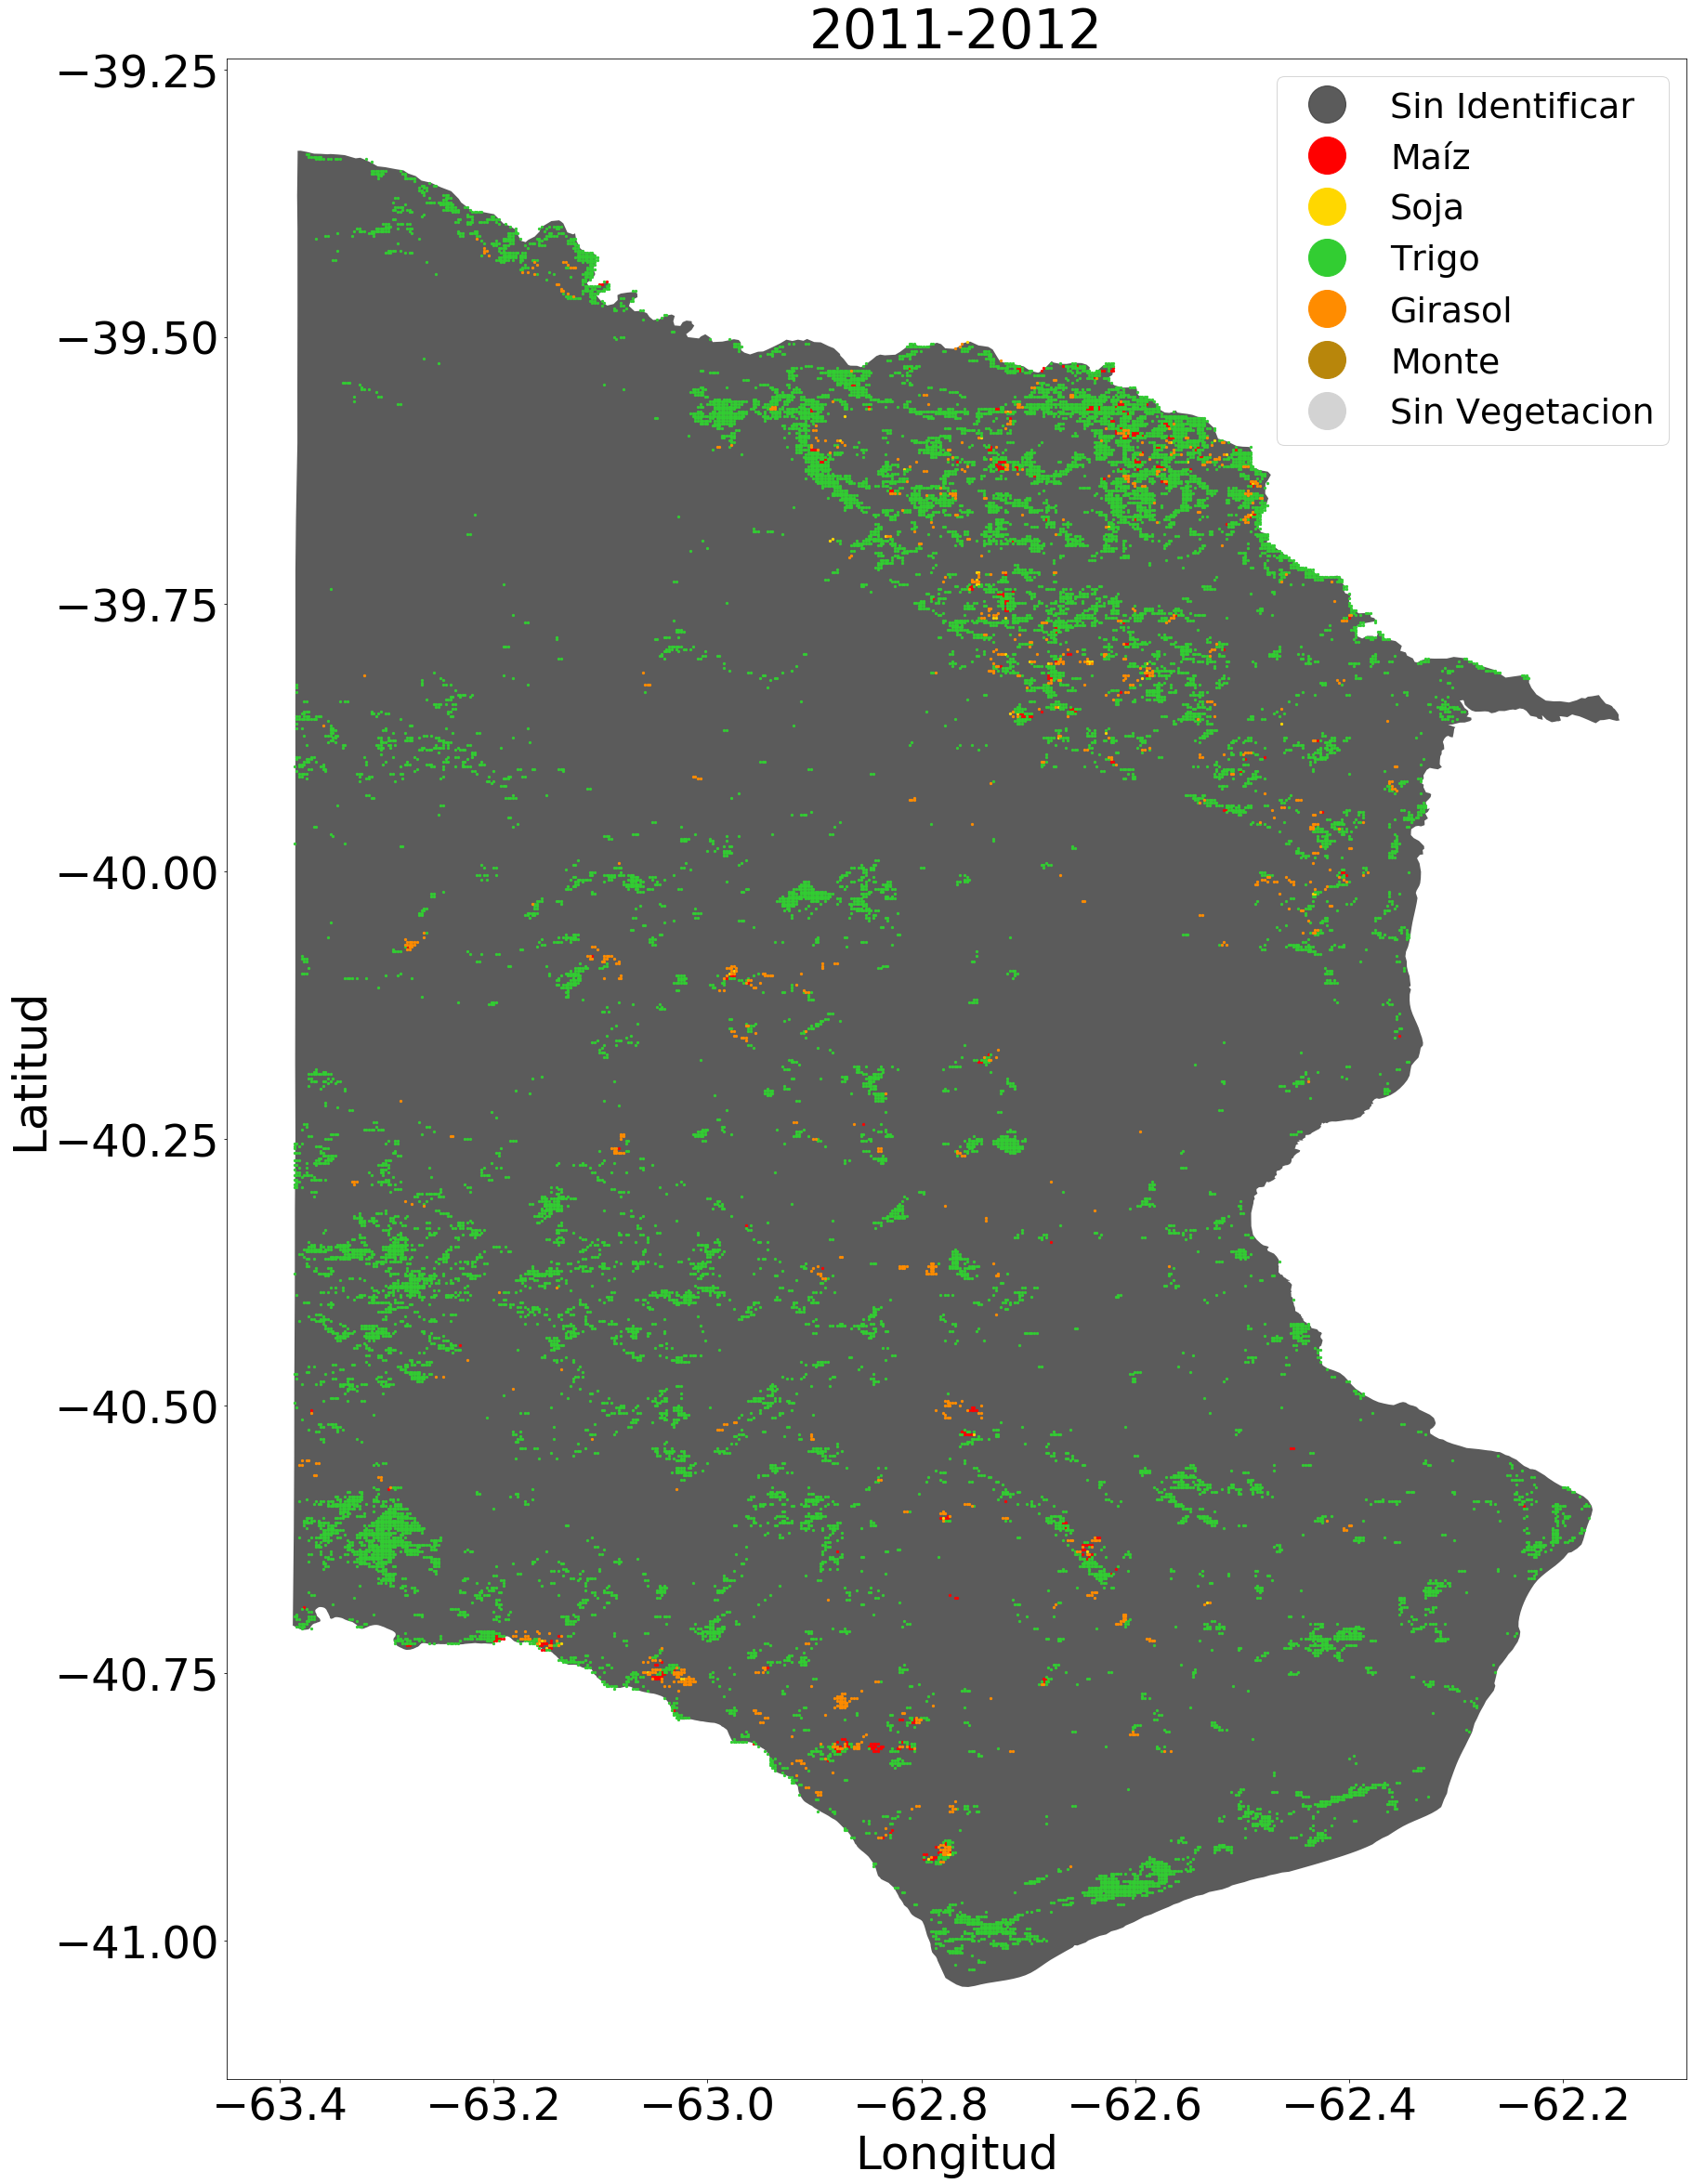

In [334]:
mapa_de_cultivos("/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff",["2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"])

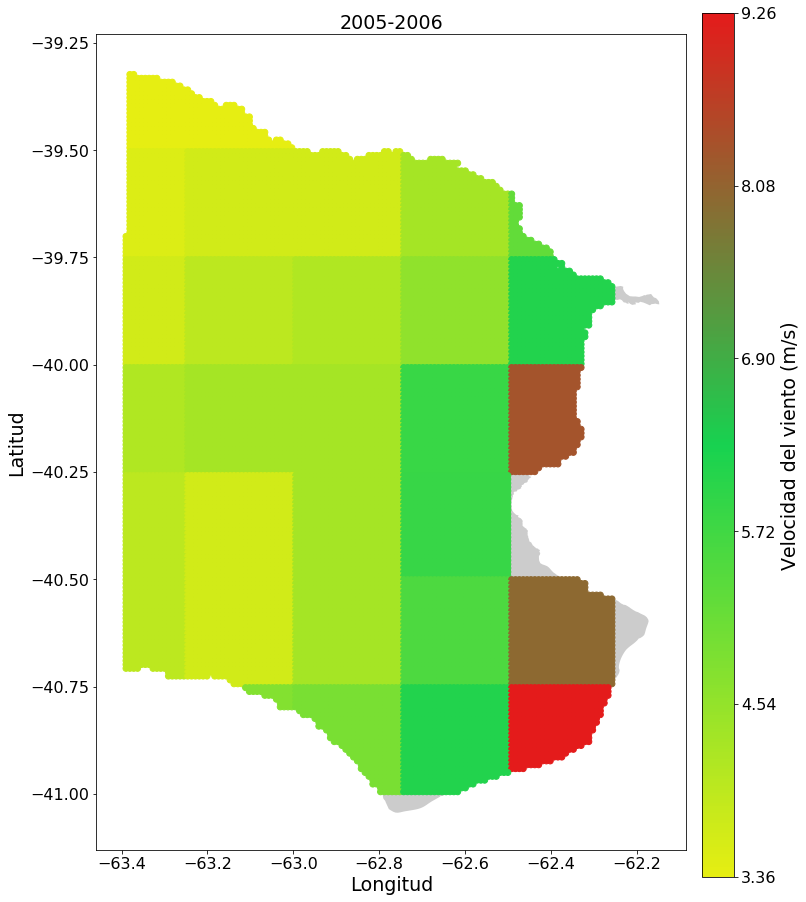

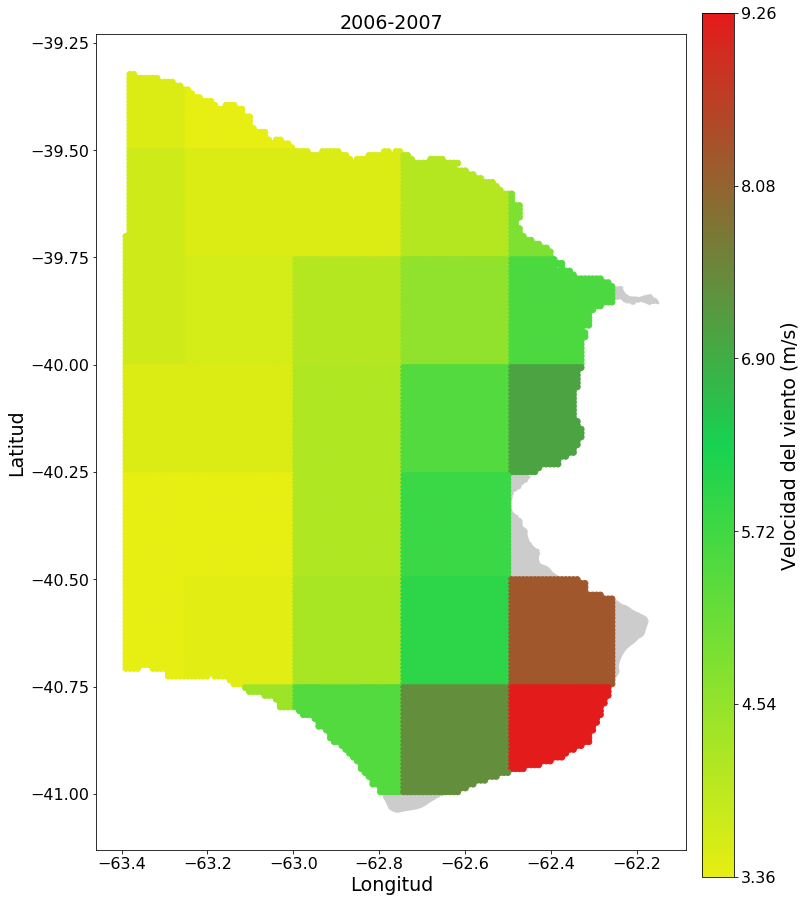

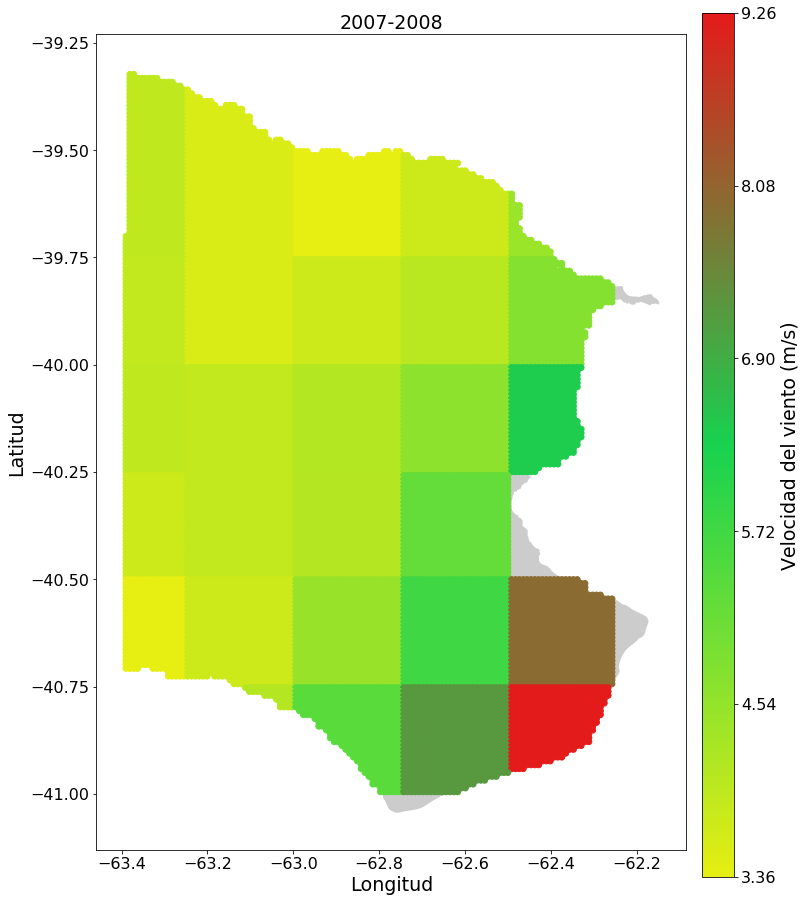

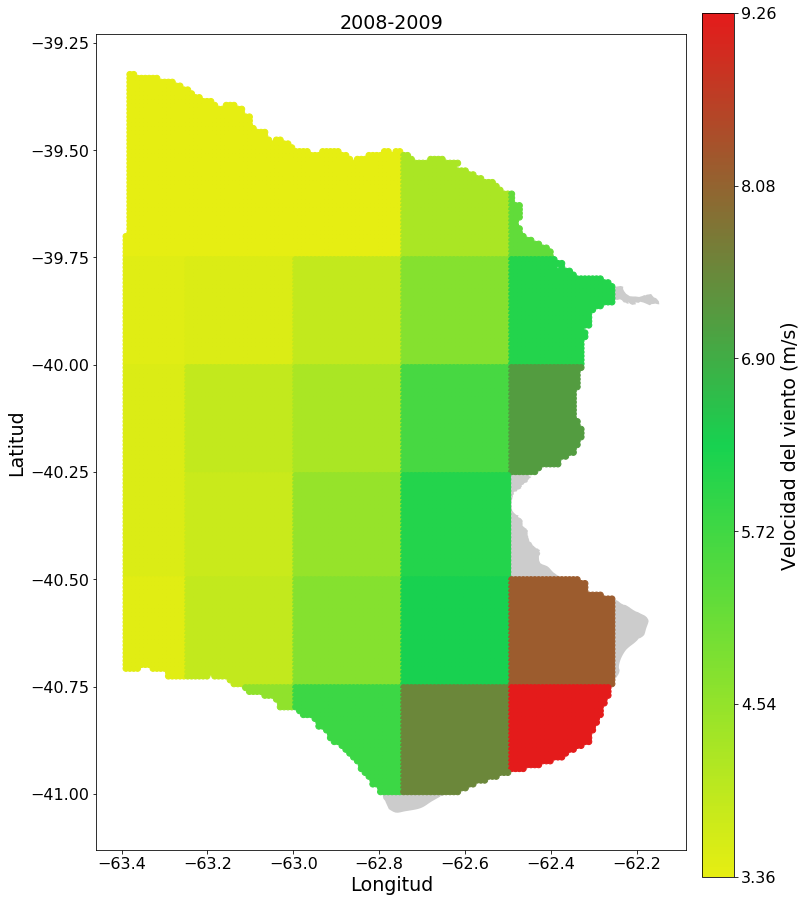

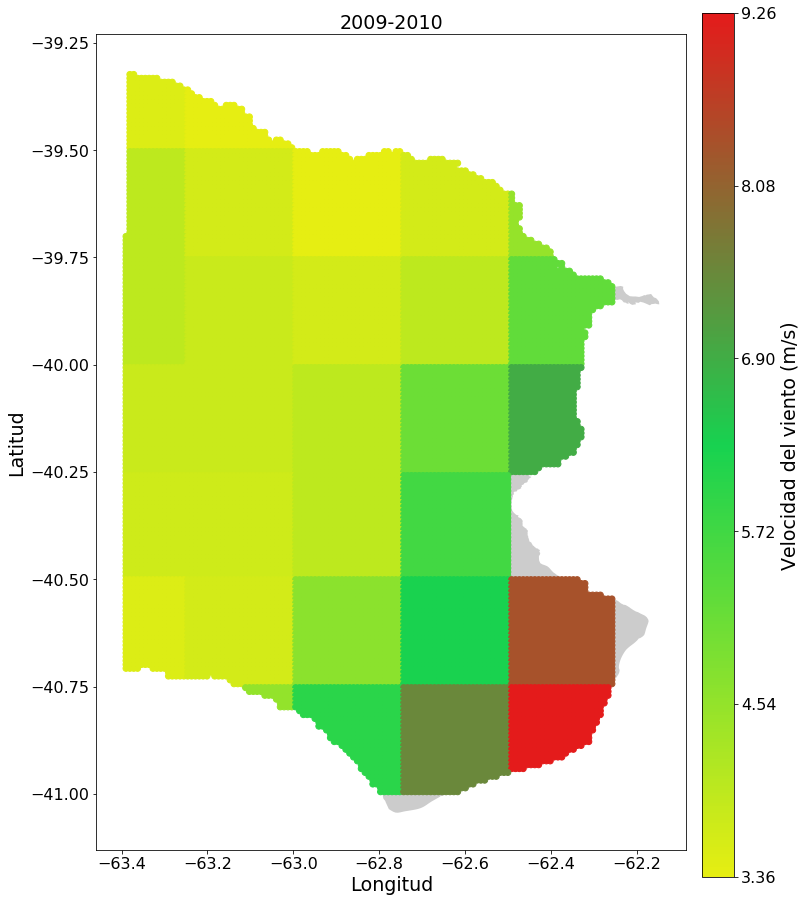

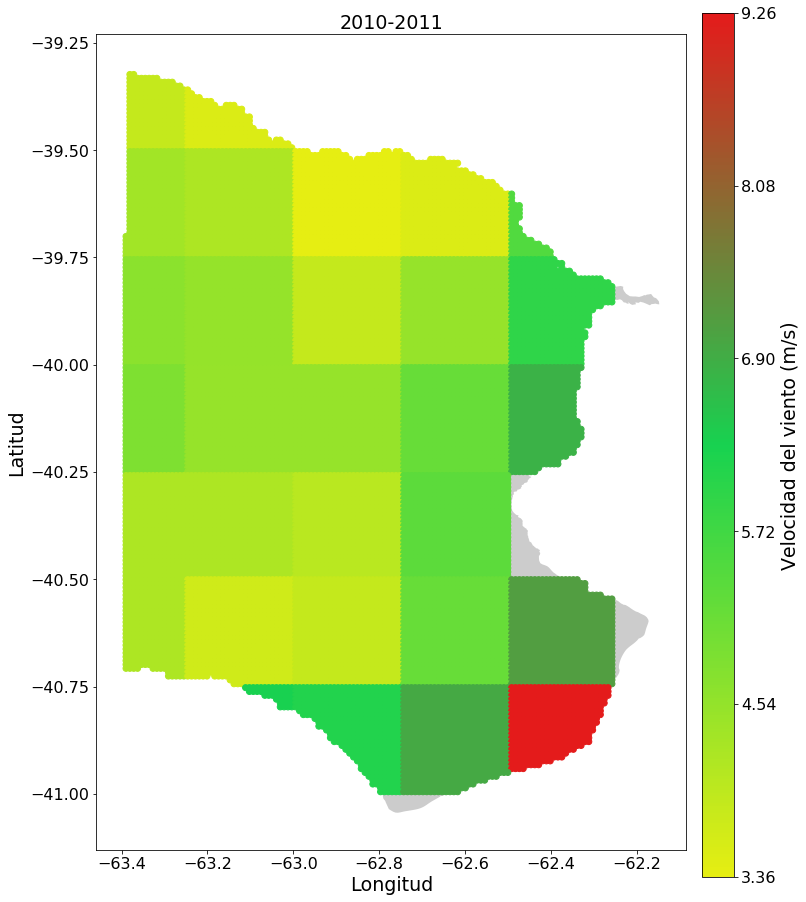

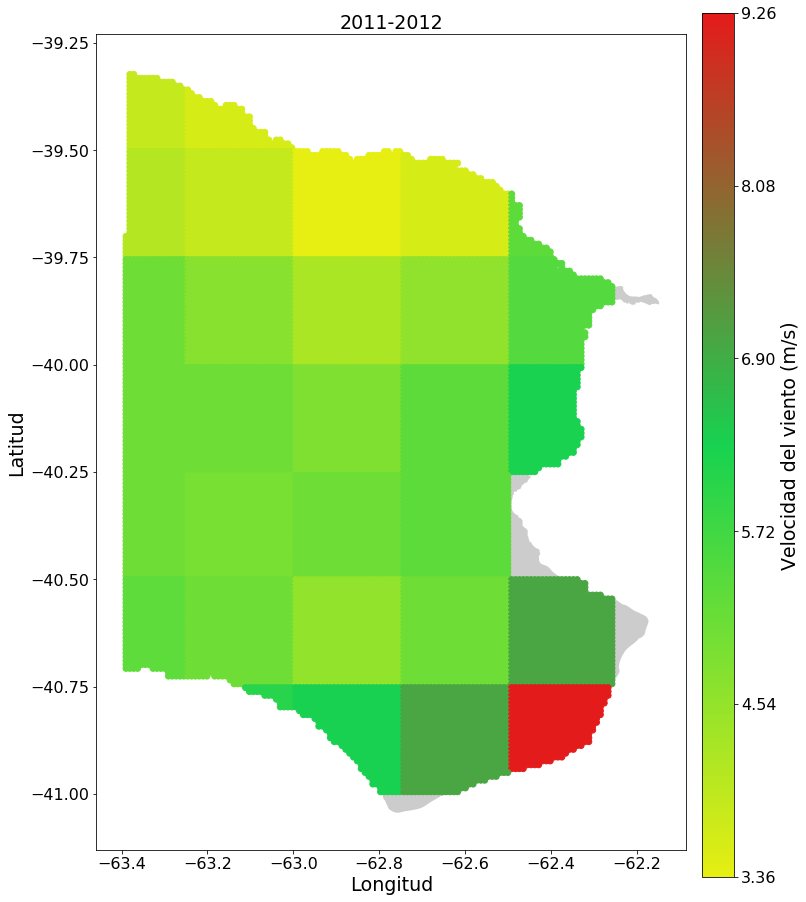

In [94]:
mapa_gif_clima("AVG_Wind_f_inst","/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff/Imagenes/Clima/giff",["2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"])

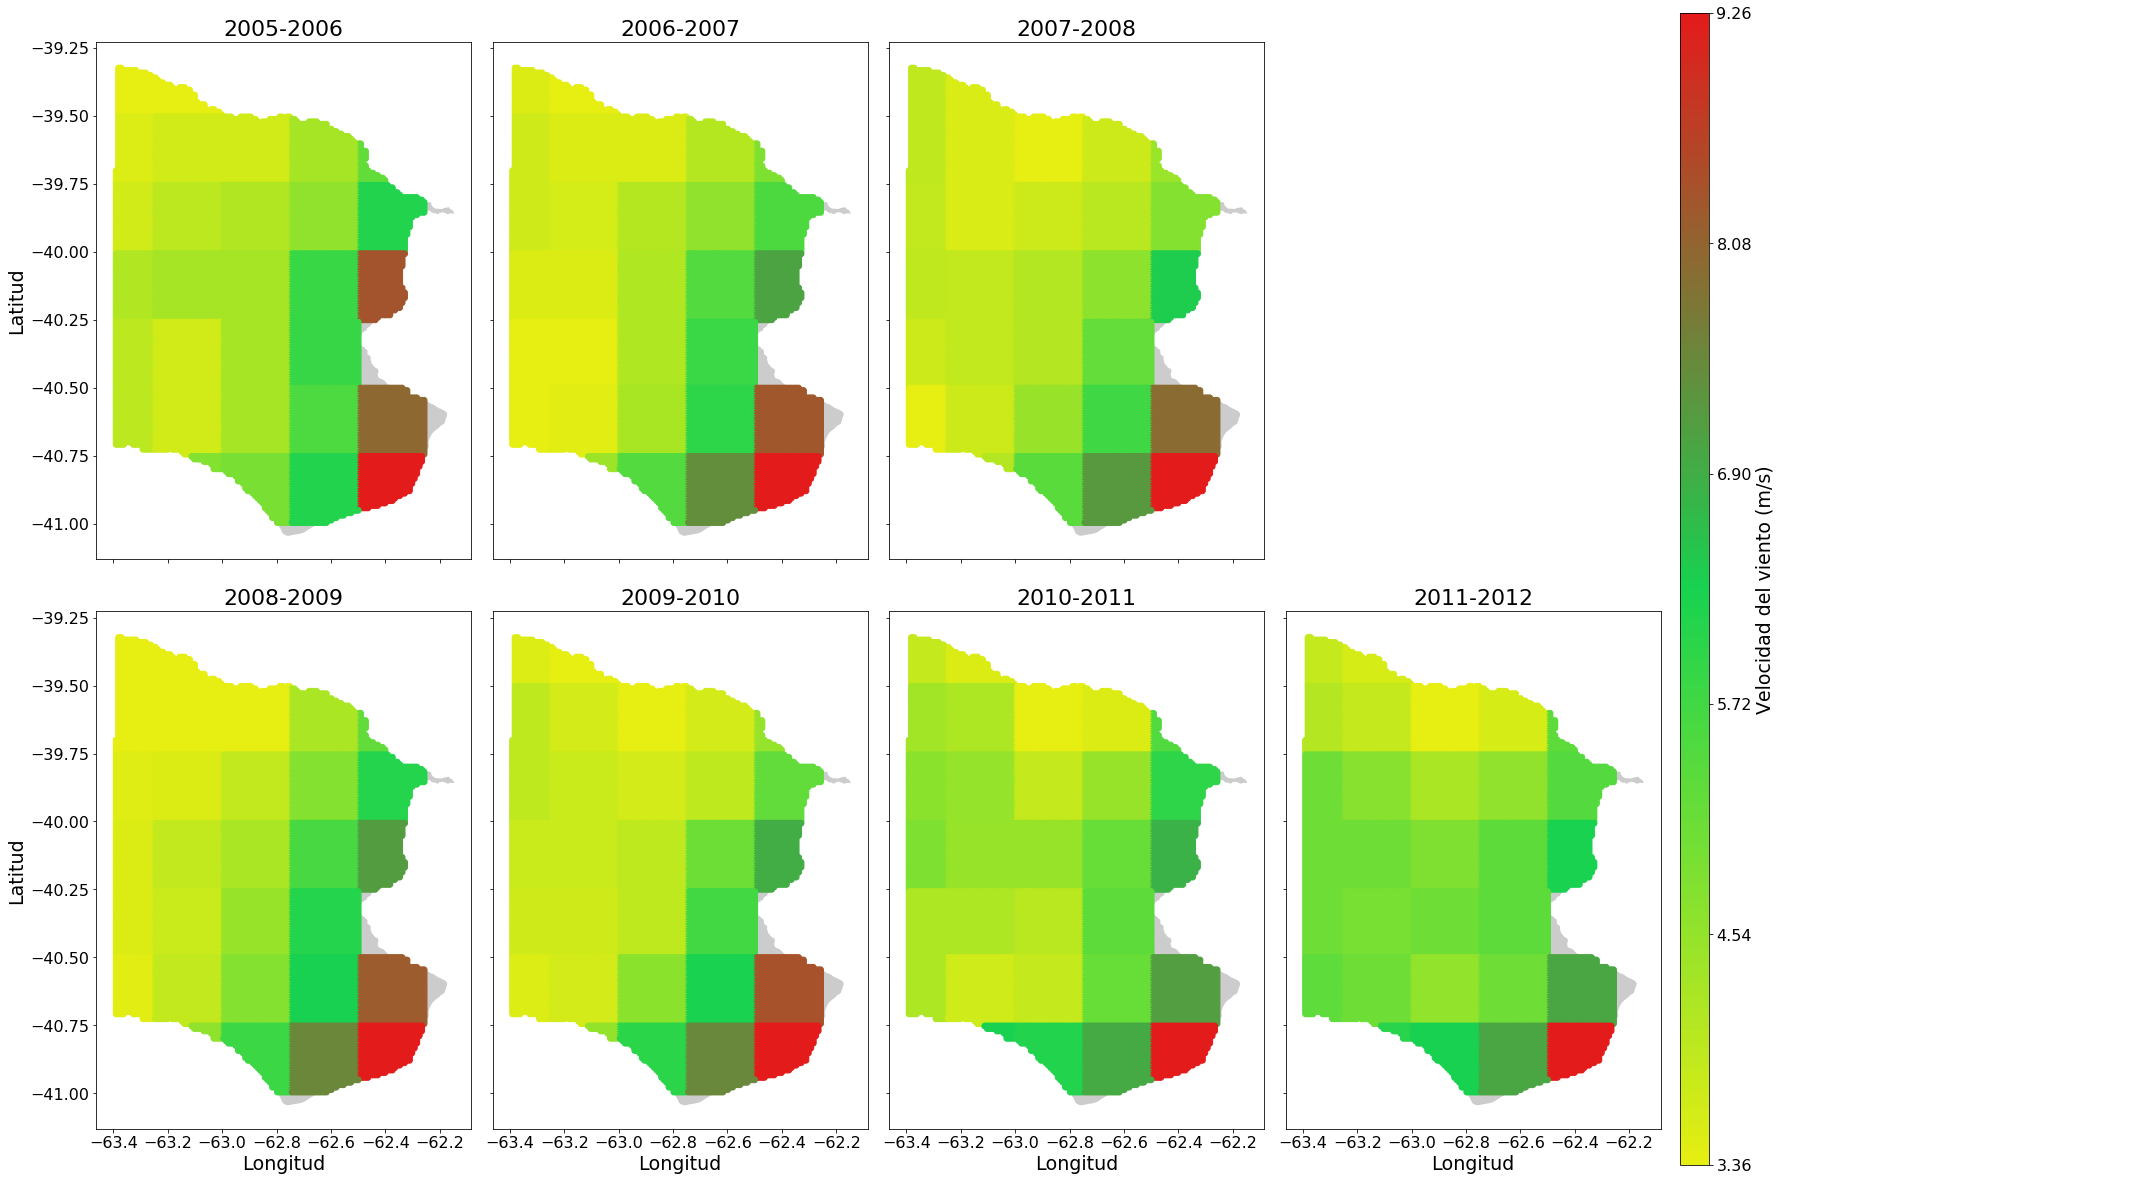

In [95]:
mapa_climatico("AVG_Wind_f_inst","/Users/lucio/OneDrive/Tesis/Datos Agro/Modelo 3/Giff/Imagenes/Clima/mapa",["2005-2006","2006-2007","2007-2008","2008-2009","2009-2010","2010-2011","2011-2012"])